In [1]:
import sys
print(sys.executable) 

/opt/homebrew/Caskroom/miniforge/base/envs/noTF/bin/python3.8


In [2]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle
import scipy.stats

# Import MAVE-NN
import mavenn

# Import Logomaker for visualization
import logomaker

# Get list of demos
mavenn.run_demo()

To run a demo, execute

	>>> mavenn.run_demo(name)

where 'name' is one of the following strings:

	1. "gb1_ge_evaluation"
	2. "mpsa_ge_training"
	3. "sortseq_mpa_visualization"

Python code for each demo is located in

	/opt/homebrew/Caskroom/miniforge/base/envs/noTF/lib/python3.8/site-packages/mavenn/examples/demos/



['gb1_ge_evaluation', 'mpsa_ge_training', 'sortseq_mpa_visualization']

# To recreate figures skip to 'Begin Here'

This section re-trains models from the original data file.

In [115]:
Data = pd.read_csv("Smith_2013.csv") # data file is Supplementary Table 4 from Smith, et al 2013
Data

,Class,Template,Pattern,TFBS,Sites,Mouse1,Mouse2,Mouse3,HepG2rep1,HepG2rep2,HepG2rep3
0,1,hg18:chr2:210861483-210861650,113:V_AHRARNT_02:GGGGATCGCGTGCCAGCCC,1,1,0.064940,0.074206,0.045815,0.140741,0.118519,0.096296
1,1,hg18:chr2:210861483-210861650,113:V_AP2GAMMA_01:GCCCGGGGG,1,1,0.135108,0.097588,0.114027,0.187500,0.137500,0.175000
2,1,hg18:chr2:210861483-210861650,113:V_COUPTF_Q6:CCCCCTGACCTTTGCCCCCTGCC,1,1,0.074345,0.070933,0.073017,0.145215,0.099010,0.099010
3,1,hg18:chr2:210861483-210861650,113:V_GATA4_Q3:AGATAACAGGGA,1,1,0.070451,0.050782,0.052824,0.144928,0.130435,0.101449
4,1,hg18:chr2:210861483-210861650,113:V_HNF1_C:AGTTAATGATTAACCAA,1,1,0.050399,0.028070,0.000000,0.087719,0.087719,0.070175
...,...,...,...,...,...,...,...,...,...,...,...
4961,3,hg18:chr9:82902419-82902586,8:V_PPARA_02:CCGGGTCATTGGGGTCAGG;30:V_XBP1_01:...,8,8,0.503989,0.532945,0.521422,0.361233,0.374449,0.374449
4962,3,hg18:chr9:82902419-82902586,8:V_Rxra_UP:GGCCGTGACCCCGTGAT;28:V_HNF3ALPHA_Q...,8,8,0.303816,0.293754,0.241722,0.327465,0.366197,0.376761
4963,3,hg18:chr9:82902419-82902586,8:V_Rxra_UP:GGCCGTGACCCCGTGAT;28:V_PPARA_02:CC...,8,8,0.060307,0.122569,0.248445,0.234375,0.250000,0.343750
4964,3,hg18:chr9:82902419-82902586,8:V_XBP1_01:GTGATGACGTGTCCCAT;28:V_Rxra_UP:GGC...,8,8,0.233858,0.303898,0.278070,0.355932,0.322034,0.313559


In [34]:
Positions = []
for Pattern in Data["Pattern"]:
    TFBSs = Pattern.split(";")
    last_position = 0
    for TFBS in TFBSs:
        new_position = int(TFBS.split(":")[0])
        if last_position > 0:
            Positions.append(new_position - last_position)
        last_position = new_position # + len(TFBS.split(":")[2])
Positions = np.asarray(Positions)
Positions

array([32, 52, 52, ..., 14, 20, 12])

In [35]:
for i in range(min(Positions), max(Positions) + 1):
    print(i, sum(Positions == i))

9 36
10 12
11 27
12 1607
13 540
14 2216
15 1885
16 980
17 710
18 122
19 339
20 4735
21 2084
22 3971
23 48
24 313
25 2
26 1575
27 10
28 162
29 143
30 0
31 198
32 213
33 23
34 7
35 29
36 12
37 322
38 6
39 143
40 0
41 22
42 0
43 112
44 0
45 5
46 0
47 0
48 21
49 0
50 0
51 7
52 12
53 0
54 0
55 36
56 0
57 0
58 0
59 6
60 5
61 13
62 8
63 2
64 0
65 24
66 0
67 4
68 11
69 4
70 0
71 0
72 0
73 2
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 23
95 0
96 0
97 0
98 0
99 12
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 4
110 0
111 2
112 6
113 0
114 0
115 0
116 0
117 28
118 0
119 4
120 0
121 0
122 0
123 2


In [39]:
Positions = []
for Pattern in Data["Pattern"]:
    TFBSs = Pattern.split(";")
    last_position = 0
    for TFBS in TFBSs:
        new_position = int(TFBS.split(":")[0])
        if last_position > 0:
            Positions.append(new_position - last_position)
        last_position = new_position + len(TFBS.split(":")[2])
Positions = np.asarray(Positions)
for i in range(min(Positions), max(Positions) + 1):
    print(i, sum(Positions == i))

0 194
1 56
2 975
3 14111
4 1943
5 3252
6 21
7 10
8 34
9 379
10 310
11 27
12 21
13 14
14 17
15 24
16 13
17 2
18 20
19 4
20 1095
21 7
22 7
23 2
24 30
25 6
26 15
27 3
28 1
29 8
30 5
31 9
32 9
33 0
34 4
35 0
36 8
37 2
38 11
39 3
40 8
41 2
42 4
43 17
44 13
45 0
46 11
47 0
48 13
49 0
50 21
51 0
52 0
53 6
54 2
55 0
56 10
57 2
58 0
59 3
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 2
72 0
73 0
74 0
75 4
76 0
77 5
78 0
79 0
80 0
81 0
82 6
83 2
84 0
85 4
86 0
87 6
88 2
89 0
90 4
91 0
92 0
93 0
94 2
95 0
96 0
97 0
98 3
99 0
100 29
101 0
102 0
103 0
104 0
105 6
106 2
107 0
108 4


In [4]:
Site_letters = {"V_AHRARNT_02": "A", "V_CEBP_Q2_01": "C", "V_HNF3ALPHA_Q6": "F", "V_GATA4_Q3": "G", 
                "V_HNF1_C": "H", "V_HNF4_Q6": "h","V_COUPTF_Q6": "N", "V_HNF6_Q6": "O", "V_PPARA_02": "P", 
                "V_Rxra_UP": "R", "V_AP2GAMMA_01": "T", "V_XBP1_01": "X"}

Sequences = []
for Template, Pattern in zip(Data["Template"], Data["Pattern"]):
    if Template == "hg18:chr2:210861483-210861650":
        sequence = ["B"]*18
    else:
        sequence = ["b"]*18
    TFBSs = Pattern.split(";")
    for TFBS in TFBSs:
        position = int(TFBS.split(":")[0])
        site = TFBS.split(":")[1]
        sequence[int(position/9)] = Site_letters[site]
    Sequences.append("".join(sequence))
Sequences

['BBBBBBBBBBBBABBBBB',
 'BBBBBBBBBBBBTBBBBB',
 'BBBBBBBBBBBBNBBBBB',
 'BBBBBBBBBBBBGBBBBB',
 'BBBBBBBBBBBBHBBBBB',
 'BBBBBBBBBBBBFBBBBB',
 'BBBBBBBBBBBBhBBBBB',
 'BBBBBBBBBBBBOBBBBB',
 'BBBBBBBBBBBBRBBBBB',
 'BBBBBBBBBBBBXBBBBB',
 'BBBBBBBBBBBBBBABBB',
 'BBBBBBBBBBBBBBTBBB',
 'BBBBBBBBBBBBBBCBBB',
 'BBBBBBBBBBBBBBNBBB',
 'BBBBBBBBBBBBBBGBBB',
 'BBBBBBBBBBBBBBHBBB',
 'BBBBBBBBBBBBBBFBBB',
 'BBBBBBBBBBBBBBhBBB',
 'BBBBBBBBBBBBBBOBBB',
 'BBBBBBBBBBBBBBRBBB',
 'BBBBBBBBBBBBBBXBBB',
 'BBBBBBBBNBBBBBBBBB',
 'BBBBBBBBABBBBBBBBB',
 'BBBBBBBBHBBBBBBBBB',
 'BBBBBBBBRBBBBBBBBB',
 'BBBBBBBBXBBBBBBBBB',
 'BBBBBBBBCBBBBBBBBB',
 'BBBBBBBBGBBBBBBBBB',
 'BBBBBBBBOBBBBBBBBB',
 'BBBBBBBBFBBBBBBBBB',
 'BBBBBBBBTBBBBBBBBB',
 'BBBBBBBBhBBBBBBBBB',
 'BBBBBBBBBABBBBBBBB',
 'BBBBBBBBBTBBBBBBBB',
 'BBBBBBBBBCBBBBBBBB',
 'BBBBBBBBBNBBBBBBBB',
 'BBBBBBBBBGBBBBBBBB',
 'BBBBBBBBBHBBBBBBBB',
 'BBBBBBBBBFBBBBBBBB',
 'BBBBBBBBBhBBBBBBBB',
 'BBBBBBBBBOBBBBBBBB',
 'BBBBBBBBBPBBBBBBBB',
 'BBBBBBBBBRBBBBBBBB',
 'TBBBBBBBB

In [116]:
Data["Pattern"] = Sequences
Data

,Class,Template,Pattern,TFBS,Sites,Mouse1,Mouse2,Mouse3,HepG2rep1,HepG2rep2,HepG2rep3
0,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBABBBBB,1,1,0.064940,0.074206,0.045815,0.140741,0.118519,0.096296
1,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBTBBBBB,1,1,0.135108,0.097588,0.114027,0.187500,0.137500,0.175000
2,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBNBBBBB,1,1,0.074345,0.070933,0.073017,0.145215,0.099010,0.099010
3,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBGBBBBB,1,1,0.070451,0.050782,0.052824,0.144928,0.130435,0.101449
4,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBHBBBBB,1,1,0.050399,0.028070,0.000000,0.087719,0.087719,0.070175
...,...,...,...,...,...,...,...,...,...,...,...
4961,3,hg18:chr9:82902419-82902586,PbbXbRbAbbhFbNbbHb,8,8,0.503989,0.532945,0.521422,0.361233,0.374449,0.374449
4962,3,hg18:chr9:82902419-82902586,RbbFAbbPbHbXbbhNbb,8,8,0.303816,0.293754,0.241722,0.327465,0.366197,0.376761
4963,3,hg18:chr9:82902419-82902586,RbbPbNbbXbAbbHbhFb,8,8,0.060307,0.122569,0.248445,0.234375,0.250000,0.343750
4964,3,hg18:chr9:82902419-82902586,XbbRbNbbPbFbhAbbHb,8,8,0.233858,0.303898,0.278070,0.355932,0.322034,0.313559


In [117]:
Data["Mouse_mean"] = (Data["Mouse1"] + Data["Mouse2"] + Data["Mouse3"])/3
Data["HepG2_mean"] = (Data["HepG2rep1"] + Data["HepG2rep2"] + Data["HepG2rep3"])/3
Data

,Class,Template,Pattern,TFBS,Sites,Mouse1,Mouse2,Mouse3,HepG2rep1,HepG2rep2,HepG2rep3,Mouse_mean,HepG2_mean
0,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBABBBBB,1,1,0.064940,0.074206,0.045815,0.140741,0.118519,0.096296,0.061654,0.118519
1,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBTBBBBB,1,1,0.135108,0.097588,0.114027,0.187500,0.137500,0.175000,0.115574,0.166667
2,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBNBBBBB,1,1,0.074345,0.070933,0.073017,0.145215,0.099010,0.099010,0.072765,0.114411
3,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBGBBBBB,1,1,0.070451,0.050782,0.052824,0.144928,0.130435,0.101449,0.058019,0.125604
4,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBHBBBBB,1,1,0.050399,0.028070,0.000000,0.087719,0.087719,0.070175,0.026156,0.081871
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,3,hg18:chr9:82902419-82902586,PbbXbRbAbbhFbNbbHb,8,8,0.503989,0.532945,0.521422,0.361233,0.374449,0.374449,0.519452,0.370044
4962,3,hg18:chr9:82902419-82902586,RbbFAbbPbHbXbbhNbb,8,8,0.303816,0.293754,0.241722,0.327465,0.366197,0.376761,0.279764,0.356808
4963,3,hg18:chr9:82902419-82902586,RbbPbNbbXbAbbHbhFb,8,8,0.060307,0.122569,0.248445,0.234375,0.250000,0.343750,0.143774,0.276042
4964,3,hg18:chr9:82902419-82902586,XbbRbNbbPbFbhAbbHb,8,8,0.233858,0.303898,0.278070,0.355932,0.322034,0.313559,0.271942,0.330508


# Begin here to recreate figures

In [7]:
import random
group = []
for i in range(len(Data)):
    group_num = random.random()
    if group_num < 0.1:
        group.append("test")
    elif group_num < 0.2:
        group.append("validation")
    else:
        group.append("training")
Data['set'] = group

# Get and report sequence length
L = len(Data.loc[0,'Pattern'])
print(f'Sequence length: {L:d} binding sites')

# Split dataset
trainval_df, test_df = mavenn.split_dataset(Data)

Data_file = open("saved_models/Smith_2013_trainval.pkl", "wb")
pickle.dump(trainval_df, Data_file)
Data_file.close()

Data_file = open("saved_models/Smith_2013_test.pkl", "wb")
pickle.dump(test_df, Data_file)
Data_file.close()

# Preview trainval_df
print('\ntrainval_df:')
trainval_df

Sequence length: 18 binding sites
Training set   :    3,954 observations (  79.62%)
Validation set :      533 observations (  10.73%)
Test set       :      479 observations (   9.65%)
-------------------------------------------------
Total dataset  :    4,966 observations ( 100.00%)


trainval_df:


,validation,Class,Template,Pattern,TFBS,Sites,Mouse1,Mouse2,Mouse3,HepG2rep1,HepG2rep2,HepG2rep3,Mouse_mean,HepG2_mean
0,False,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBABBBBB,1,1,0.064940,0.074206,0.045815,0.140741,0.118519,0.096296,0.061654,0.118519
1,False,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBTBBBBB,1,1,0.135108,0.097588,0.114027,0.187500,0.137500,0.175000,0.115574,0.166667
2,False,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBNBBBBB,1,1,0.074345,0.070933,0.073017,0.145215,0.099010,0.099010,0.072765,0.114411
3,False,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBGBBBBB,1,1,0.070451,0.050782,0.052824,0.144928,0.130435,0.101449,0.058019,0.125604
4,False,1,hg18:chr2:210861483-210861650,BBBBBBBBBBBBHBBBBB,1,1,0.050399,0.028070,0.000000,0.087719,0.087719,0.070175,0.026156,0.081871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,False,3,hg18:chr9:82902419-82902586,PbbXbRbAbbhFbNbbHb,8,8,0.503989,0.532945,0.521422,0.361233,0.374449,0.374449,0.519452,0.370044
4483,False,3,hg18:chr9:82902419-82902586,RbbFAbbPbHbXbbhNbb,8,8,0.303816,0.293754,0.241722,0.327465,0.366197,0.376761,0.279764,0.356808
4484,False,3,hg18:chr9:82902419-82902586,RbbPbNbbXbAbbHbhFb,8,8,0.060307,0.122569,0.248445,0.234375,0.250000,0.343750,0.143774,0.276042
4485,True,3,hg18:chr9:82902419-82902586,XbbRbNbbPbFbhAbbHb,8,8,0.233858,0.303898,0.278070,0.355932,0.322034,0.313559,0.271942,0.330508


In [50]:
# Set default keyword arguments for model.Model()
default_model_kwargs = {
    'L':L,
    'alphabet':list(Site_letters.values()) + ["B", "b"],
    'regression_type':'GE',
    'ge_noise_model_type':'SkewedT',
    'ge_heteroskedasticity_order':2
}

# Set default keyword arguments for model.fit()
default_fit_kwargs = {
    'learning_rate':.001,
    'epochs':500,
    'batch_size':200,
    'early_stopping':True,
    'early_stopping_patience':30,
    'linear_initialization':False,
    'verbose':False
}

# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']
print(f'Training {len(gpmap_types)} models: {gpmap_types}')
for i in range(10):
    for gpmap_type in gpmap_types:

        # Set model name
        model_name = f'Smith_2013_{gpmap_type}_ge_{i}'
        print('-----------------------------')
        print(f"Training '{model_name}' model...\n")

        # Copy keyword arguments
        model_kwargs = default_model_kwargs.copy()
        fit_kwargs = default_fit_kwargs.copy()

        # Modify keyword arguments based on G-P map being trained
        # Note: the need for different hyperparameters, such as batch_size
        # and learning_rate, was found by trial and error.
        if gpmap_type=='additive': pass;
        elif gpmap_type=='neighbor': pass;
        elif gpmap_type=='pairwise':
            fit_kwargs['batch_size'] = 50
        elif gpmap_type=='blackbox':
            model_kwargs['gpmap_kwargs'] = {'hidden_layer_sizes':[10]*5,
                                        'features':'pairwise'}
            fit_kwargs['learning_rate'] = 0.0005
            fit_kwargs['batch_size'] = 50
            fit_kwargs['early_stopping_patience'] = 10

        # Instantiate model using the keyword arguments in model_kwargs dict
        model = mavenn.Model(gpmap_type=gpmap_type, **model_kwargs)

        # Set training data
        model.set_data(x=trainval_df['Pattern'],
                       y=trainval_df['Mouse_mean'],
                       validation_flags=trainval_df['validation'])

        # Train model using the keyword arguments in fig_kwargs dict
        model.fit(**fit_kwargs)

        # Compute variational information on test data
        I_var, dI_var =  model.I_variational(x=test_df['Pattern'], y=test_df['Mouse_mean'])
        print(f'test_I_var: {I_var:.3f} +- {dI_var:.3f} bits')

        # Compute predictive information on test data
        I_pred, dI_pred = model.I_predictive(x=test_df['Pattern'], y=test_df['Mouse_mean'])
        print(f'test_I_pred: {I_pred:.3f} +- {dI_pred:.3f} bits')

        # Save model to file
        model.save(model_name)

print('Done!')

Training 4 models: ['additive', 'neighbor', 'pairwise', 'blackbox']
-----------------------------
Training 'Smith_2013_additive_ge_0' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.275 sec.


0epoch [00:00, ?epoch/s]

Training time: 16.6 seconds
test_I_var: 0.795 +- 0.080 bits
test_I_pred: 0.776 +- 0.052 bits
Model saved to these files:
	Smith_2013_additive_ge_0.pickle
	Smith_2013_additive_ge_0.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_0' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.235 sec.


0epoch [00:00, ?epoch/s]

Training time: 137.8 seconds
test_I_var: 0.706 +- 0.080 bits
test_I_pred: 0.827 +- 0.031 bits
Model saved to these files:
	Smith_2013_neighbor_ge_0.pickle
	Smith_2013_neighbor_ge_0.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_0' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.466 sec.


0epoch [00:00, ?epoch/s]

Training time: 35.6 seconds
test_I_var: -0.236 +- 0.177 bits
test_I_pred: 0.683 +- 0.059 bits
Model saved to these files:
	Smith_2013_pairwise_ge_0.pickle
	Smith_2013_pairwise_ge_0.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_0' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.485 sec.


0epoch [00:00, ?epoch/s]

Training time: 51.1 seconds
test_I_var: 0.075 +- 0.179 bits
test_I_pred: 0.783 +- 0.047 bits
Model saved to these files:
	Smith_2013_blackbox_ge_0.pickle
	Smith_2013_blackbox_ge_0.h5
-----------------------------
Training 'Smith_2013_additive_ge_1' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.433 sec.


0epoch [00:00, ?epoch/s]

Training time: 20.4 seconds
test_I_var: 0.778 +- 0.077 bits
test_I_pred: 0.796 +- 0.031 bits
Model saved to these files:
	Smith_2013_additive_ge_1.pickle
	Smith_2013_additive_ge_1.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_1' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.255 sec.


0epoch [00:00, ?epoch/s]

Training time: 170.4 seconds
test_I_var: 0.657 +- 0.074 bits
test_I_pred: 0.772 +- 0.033 bits
Model saved to these files:
	Smith_2013_neighbor_ge_1.pickle
	Smith_2013_neighbor_ge_1.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_1' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.165 sec.


0epoch [00:00, ?epoch/s]

Training time: 23.8 seconds
test_I_var: -0.517 +- 0.211 bits
test_I_pred: 0.641 +- 0.032 bits
Model saved to these files:
	Smith_2013_pairwise_ge_1.pickle
	Smith_2013_pairwise_ge_1.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_1' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.149 sec.


0epoch [00:00, ?epoch/s]

Training time: 42.7 seconds
test_I_var: -0.218 +- 0.180 bits
test_I_pred: 0.761 +- 0.037 bits
Model saved to these files:
	Smith_2013_blackbox_ge_1.pickle
	Smith_2013_blackbox_ge_1.h5
-----------------------------
Training 'Smith_2013_additive_ge_2' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.33 sec.


0epoch [00:00, ?epoch/s]

Training time: 14.8 seconds
test_I_var: 0.758 +- 0.085 bits
test_I_pred: 0.786 +- 0.048 bits
Model saved to these files:
	Smith_2013_additive_ge_2.pickle
	Smith_2013_additive_ge_2.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_2' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.158 sec.


0epoch [00:00, ?epoch/s]

Training time: 100.0 seconds
test_I_var: 0.719 +- 0.079 bits
test_I_pred: 0.772 +- 0.035 bits
Model saved to these files:
	Smith_2013_neighbor_ge_2.pickle
	Smith_2013_neighbor_ge_2.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_2' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.159 sec.


0epoch [00:00, ?epoch/s]

Training time: 27.4 seconds
test_I_var: -0.412 +- 0.204 bits
test_I_pred: 0.666 +- 0.042 bits
Model saved to these files:
	Smith_2013_pairwise_ge_2.pickle
	Smith_2013_pairwise_ge_2.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_2' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.177 sec.


0epoch [00:00, ?epoch/s]

Training time: 63.6 seconds
test_I_var: 0.157 +- 0.148 bits
test_I_pred: 0.771 +- 0.038 bits
Model saved to these files:
	Smith_2013_blackbox_ge_2.pickle
	Smith_2013_blackbox_ge_2.h5
-----------------------------
Training 'Smith_2013_additive_ge_3' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.297 sec.


0epoch [00:00, ?epoch/s]

Training time: 16.3 seconds
test_I_var: 0.781 +- 0.073 bits
test_I_pred: 0.772 +- 0.035 bits
Model saved to these files:
	Smith_2013_additive_ge_3.pickle
	Smith_2013_additive_ge_3.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_3' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.247 sec.


0epoch [00:00, ?epoch/s]

Training time: 113.5 seconds
test_I_var: 0.729 +- 0.086 bits
test_I_pred: 0.866 +- 0.042 bits
Model saved to these files:
	Smith_2013_neighbor_ge_3.pickle
	Smith_2013_neighbor_ge_3.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_3' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.164 sec.


0epoch [00:00, ?epoch/s]

Training time: 34.0 seconds
test_I_var: -0.212 +- 0.180 bits
test_I_pred: 0.692 +- 0.032 bits
Model saved to these files:
	Smith_2013_pairwise_ge_3.pickle
	Smith_2013_pairwise_ge_3.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_3' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.156 sec.


0epoch [00:00, ?epoch/s]

Training time: 58.3 seconds
test_I_var: -0.060 +- 0.162 bits
test_I_pred: 0.768 +- 0.049 bits
Model saved to these files:
	Smith_2013_blackbox_ge_3.pickle
	Smith_2013_blackbox_ge_3.h5
-----------------------------
Training 'Smith_2013_additive_ge_4' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.384 sec.


0epoch [00:00, ?epoch/s]

Training time: 18.3 seconds
test_I_var: 0.783 +- 0.075 bits
test_I_pred: 0.823 +- 0.041 bits
Model saved to these files:
	Smith_2013_additive_ge_4.pickle
	Smith_2013_additive_ge_4.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_4' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.187 sec.


0epoch [00:00, ?epoch/s]

Training time: 104.6 seconds
test_I_var: 0.708 +- 0.082 bits
test_I_pred: 0.842 +- 0.034 bits
Model saved to these files:
	Smith_2013_neighbor_ge_4.pickle
	Smith_2013_neighbor_ge_4.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_4' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.222 sec.


0epoch [00:00, ?epoch/s]

Training time: 27.9 seconds
test_I_var: -0.382 +- 0.205 bits
test_I_pred: 0.694 +- 0.042 bits
Model saved to these files:
	Smith_2013_pairwise_ge_4.pickle
	Smith_2013_pairwise_ge_4.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_4' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.157 sec.


0epoch [00:00, ?epoch/s]

Training time: 55.7 seconds
test_I_var: -0.040 +- 0.182 bits
test_I_pred: 0.733 +- 0.045 bits
Model saved to these files:
	Smith_2013_blackbox_ge_4.pickle
	Smith_2013_blackbox_ge_4.h5
-----------------------------
Training 'Smith_2013_additive_ge_5' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.154 sec.


0epoch [00:00, ?epoch/s]

Training time: 12.1 seconds
test_I_var: 0.781 +- 0.074 bits
test_I_pred: 0.836 +- 0.030 bits
Model saved to these files:
	Smith_2013_additive_ge_5.pickle
	Smith_2013_additive_ge_5.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_5' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.17 sec.


0epoch [00:00, ?epoch/s]

Training time: 73.2 seconds
test_I_var: 0.700 +- 0.083 bits
test_I_pred: 0.809 +- 0.029 bits
Model saved to these files:
	Smith_2013_neighbor_ge_5.pickle
	Smith_2013_neighbor_ge_5.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_5' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.347 sec.


0epoch [00:00, ?epoch/s]

Training time: 36.8 seconds
test_I_var: -0.054 +- 0.160 bits
test_I_pred: 0.734 +- 0.057 bits
Model saved to these files:
	Smith_2013_pairwise_ge_5.pickle
	Smith_2013_pairwise_ge_5.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_5' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.172 sec.


0epoch [00:00, ?epoch/s]

Training time: 68.3 seconds
test_I_var: -0.280 +- 0.201 bits
test_I_pred: 0.805 +- 0.045 bits
Model saved to these files:
	Smith_2013_blackbox_ge_5.pickle
	Smith_2013_blackbox_ge_5.h5
-----------------------------
Training 'Smith_2013_additive_ge_6' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.159 sec.


0epoch [00:00, ?epoch/s]

Training time: 16.5 seconds
test_I_var: 0.765 +- 0.071 bits
test_I_pred: 0.765 +- 0.045 bits
Model saved to these files:
	Smith_2013_additive_ge_6.pickle
	Smith_2013_additive_ge_6.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_6' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.224 sec.


0epoch [00:00, ?epoch/s]

Training time: 79.7 seconds
test_I_var: 0.687 +- 0.083 bits
test_I_pred: 0.822 +- 0.029 bits
Model saved to these files:
	Smith_2013_neighbor_ge_6.pickle
	Smith_2013_neighbor_ge_6.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_6' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.234 sec.


0epoch [00:00, ?epoch/s]

Training time: 31.8 seconds
test_I_var: -0.218 +- 0.167 bits
test_I_pred: 0.651 +- 0.035 bits
Model saved to these files:
	Smith_2013_pairwise_ge_6.pickle
	Smith_2013_pairwise_ge_6.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_6' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.149 sec.


0epoch [00:00, ?epoch/s]

Training time: 64.8 seconds
test_I_var: -0.076 +- 0.173 bits
test_I_pred: 0.770 +- 0.041 bits
Model saved to these files:
	Smith_2013_blackbox_ge_6.pickle
	Smith_2013_blackbox_ge_6.h5
-----------------------------
Training 'Smith_2013_additive_ge_7' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.159 sec.


0epoch [00:00, ?epoch/s]

Training time: 11.7 seconds
test_I_var: 0.735 +- 0.075 bits
test_I_pred: 0.806 +- 0.043 bits
Model saved to these files:
	Smith_2013_additive_ge_7.pickle
	Smith_2013_additive_ge_7.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_7' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.15 sec.


0epoch [00:00, ?epoch/s]

Training time: 111.0 seconds
test_I_var: 0.731 +- 0.078 bits
test_I_pred: 0.772 +- 0.037 bits
Model saved to these files:
	Smith_2013_neighbor_ge_7.pickle
	Smith_2013_neighbor_ge_7.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_7' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.198 sec.


0epoch [00:00, ?epoch/s]

Training time: 33.5 seconds
test_I_var: -0.491 +- 0.209 bits
test_I_pred: 0.659 +- 0.039 bits
Model saved to these files:
	Smith_2013_pairwise_ge_7.pickle
	Smith_2013_pairwise_ge_7.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_7' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.19 sec.


0epoch [00:00, ?epoch/s]

Training time: 60.8 seconds
test_I_var: -0.133 +- 0.160 bits
test_I_pred: 0.737 +- 0.038 bits
Model saved to these files:
	Smith_2013_blackbox_ge_7.pickle
	Smith_2013_blackbox_ge_7.h5
-----------------------------
Training 'Smith_2013_additive_ge_8' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.173 sec.


0epoch [00:00, ?epoch/s]

Training time: 15.1 seconds
test_I_var: 0.755 +- 0.074 bits
test_I_pred: 0.771 +- 0.040 bits
Model saved to these files:
	Smith_2013_additive_ge_8.pickle
	Smith_2013_additive_ge_8.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_8' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.157 sec.


0epoch [00:00, ?epoch/s]

Training time: 82.8 seconds
test_I_var: 0.685 +- 0.077 bits
test_I_pred: 0.844 +- 0.033 bits
Model saved to these files:
	Smith_2013_neighbor_ge_8.pickle
	Smith_2013_neighbor_ge_8.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_8' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.22 sec.


0epoch [00:00, ?epoch/s]

Training time: 29.9 seconds
test_I_var: -0.603 +- 0.215 bits
test_I_pred: 0.700 +- 0.044 bits
Model saved to these files:
	Smith_2013_pairwise_ge_8.pickle
	Smith_2013_pairwise_ge_8.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_8' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.185 sec.


0epoch [00:00, ?epoch/s]

Training time: 62.5 seconds
test_I_var: -0.395 +- 0.200 bits
test_I_pred: 0.726 +- 0.049 bits
Model saved to these files:
	Smith_2013_blackbox_ge_8.pickle
	Smith_2013_blackbox_ge_8.h5
-----------------------------
Training 'Smith_2013_additive_ge_9' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.169 sec.


0epoch [00:00, ?epoch/s]

Training time: 12.9 seconds
test_I_var: 0.805 +- 0.077 bits
test_I_pred: 0.808 +- 0.037 bits
Model saved to these files:
	Smith_2013_additive_ge_9.pickle
	Smith_2013_additive_ge_9.h5
-----------------------------
Training 'Smith_2013_neighbor_ge_9' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.154 sec.


0epoch [00:00, ?epoch/s]

Training time: 95.7 seconds
test_I_var: 0.661 +- 0.083 bits
test_I_pred: 0.799 +- 0.028 bits
Model saved to these files:
	Smith_2013_neighbor_ge_9.pickle
	Smith_2013_neighbor_ge_9.h5
-----------------------------
Training 'Smith_2013_pairwise_ge_9' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.171 sec.


0epoch [00:00, ?epoch/s]

Training time: 31.0 seconds
test_I_var: -0.434 +- 0.201 bits
test_I_pred: 0.730 +- 0.044 bits
Model saved to these files:
	Smith_2013_pairwise_ge_9.pickle
	Smith_2013_pairwise_ge_9.h5
-----------------------------
Training 'Smith_2013_blackbox_ge_9' model...

N = 4,487 observations set as training data.
Using 11.9% for validation.
Data shuffled.
Time to set data: 0.251 sec.


0epoch [00:00, ?epoch/s]

Training time: 49.4 seconds
test_I_var: -0.342 +- 0.204 bits
test_I_pred: 0.780 +- 0.040 bits
Model saved to these files:
	Smith_2013_blackbox_ge_9.pickle
	Smith_2013_blackbox_ge_9.h5
Done!


In [4]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names
model_names = [f'Smith_2013_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(10)]

# Load models into a dictionary indexed by model name
model_dict = {name:mavenn.load(name) for name in model_names}

2023-06-05 17:09:16.497469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model loaded from these files:
	Smith_2013_additive_ge_0.pickle
	Smith_2013_additive_ge_0.h5
Model loaded from these files:
	Smith_2013_additive_ge_1.pickle
	Smith_2013_additive_ge_1.h5
Model loaded from these files:
	Smith_2013_additive_ge_2.pickle
	Smith_2013_additive_ge_2.h5
Model loaded from these files:
	Smith_2013_additive_ge_3.pickle
	Smith_2013_additive_ge_3.h5
Model loaded from these files:
	Smith_2013_additive_ge_4.pickle
	Smith_2013_additive_ge_4.h5
Model loaded from these files:
	Smith_2013_additive_ge_5.pickle
	Smith_2013_additive_ge_5.h5
Model loaded from these files:
	Smith_2013_additive_ge_6.pickle
	Smith_2013_additive_ge_6.h5
Model loaded from these files:
	Smith_2013_additive_ge_7.pickle
	Smith_2013_additive_ge_7.h5
Model loaded from these files:
	Smith_2013_additive_ge_8.pickle
	Smith_2013_additive_ge_8.h5
Model loaded from these files:
	Smith_2013_additive_ge_9.pickle
	Smith_2013_additive_ge_9.h5
Model loaded from these files:
	Smith_2013_neighbor_ge_0.pickle
	Smith

0.7271942926730168
0.7742975638534128


/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_56156/30386265.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(var_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_56156/30386265.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)


0.7919500787269542
0.7456229155457069
0.7915897326371445
0.8334606057031446
0.8017165388007829
0.8036749396961472
0.7751170740825111
0.8159601736175723
0.72507770004654


/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_56156/30386265.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(var_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_56156/30386265.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)


0.7621772791054329
0.7919626888131222
0.8501565382885918
0.8394752993984841
0.7930015979908406
0.8081728012015853
0.7966132968716314
0.8266785921804604
0.8191412621942555
0.7535260023757312


/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_56156/30386265.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(var_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_56156/30386265.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)


0.639495018732172
0.6527167039321063
0.7017457192949385
0.6985291341936012
0.757852933397838
0.6497352140545095
0.6750170168937712
0.7295955441416646
0.7207653328356599
0.7905060482458178


/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_56156/30386265.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(var_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_56156/30386265.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)


0.7538122544084278
0.7452243383377326
0.7798768036388353
0.7790500229730646
0.7795625479188776
0.7812089622440955
0.720528095663632
0.7063554773344539
0.7775121979291689
Contents of info_df:
                       name     gpmap  metric         I        dI
0  Smith_2013_additive_ge_5  additive   I_var  0.726514  0.077509
1  Smith_2013_additive_ge_5  additive  I_pred  0.833461  0.039230
2  Smith_2013_neighbor_ge_3  neighbor   I_var  0.729246  0.076901
3  Smith_2013_neighbor_ge_3  neighbor  I_pred  0.850157  0.039075
4  Smith_2013_pairwise_ge_5  pairwise   I_var -0.054528  0.163951
5  Smith_2013_pairwise_ge_5  pairwise  I_pred  0.757853  0.040396
6  Smith_2013_blackbox_ge_0  blackbox   I_var  0.061419  0.150393
7  Smith_2013_blackbox_ge_0  blackbox  I_pred  0.790506  0.053109


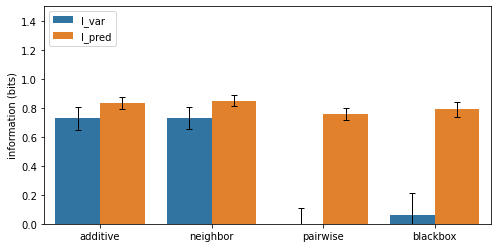

In [6]:
# Fill out dataframe containing values to plot
# This dataframe will then be used by seaborn's barplot() function
info_df = pd.DataFrame(columns=['name', 'gpmap', 'metric', 'I', 'dI'])
model_names = []
for gpmap_type in gpmap_types:
    for i in range(10):

        # Get model
        name = f'Smith_2013_{gpmap_type}_ge_{i}'
        model = model_dict[name]

        # Compute variational information on test data
        I_var, dI_var =  model.I_variational(x=test_df['Pattern'], y=test_df['Mouse_mean'])
        var_row = {'name':name,
               'gpmap':gpmap_type,
               'metric':'I_var',
               'I':I_var,
               'dI':dI_var}

        # Compute predictive information on test data
        I_pred, dI_pred = model.I_predictive(x=test_df['Pattern'], y=test_df['Mouse_mean'])
        pred_row = {'name':name,
               'gpmap':gpmap_type,
               'metric':'I_pred',
               'I':I_pred,
               'dI':dI_pred}
        print(I_pred)
        if i == 0:
            info_df = info_df.append(var_row, ignore_index=True)
            info_df = info_df.append(pred_row, ignore_index=True)
            model_names.append(name)
        elif I_pred > info_df['I'][len(info_df['I']) - 1]:
            info_df.iloc[len(info_df) - 2] = var_row
            info_df.iloc[len(info_df) - 1] = pred_row
            model_names[-1] = name

# Print dataframe
print('Contents of info_df:', info_df, sep='\n')

# Create figure
fig, ax = plt.subplots(figsize=[8, 4])

# Plot bars
sns.barplot(ax=ax,
            data=info_df,
            hue='metric',
            x='gpmap',
            y='I')

# Plot errorbars
x = np.array([[x-.2,x+.2] for x in range(4)]).ravel()
ax.errorbar(x=x,
            y=info_df['I'].values,
            yerr=info_df['dI'].values,
            color='k', capsize=3, linestyle='none',
            elinewidth=1, capthick=1, solid_capstyle='round')

ax.set_ylabel('information (bits)')
ax.set_xlabel('')
ax.set_xlim([-.5, 3.5])
ax.set_ylim([0, 1.5])
ax.legend(loc='upper left')

In [7]:
model_names

['Smith_2013_additive_ge_5',
 'Smith_2013_neighbor_ge_3',
 'Smith_2013_pairwise_ge_5',
 'Smith_2013_blackbox_ge_0']

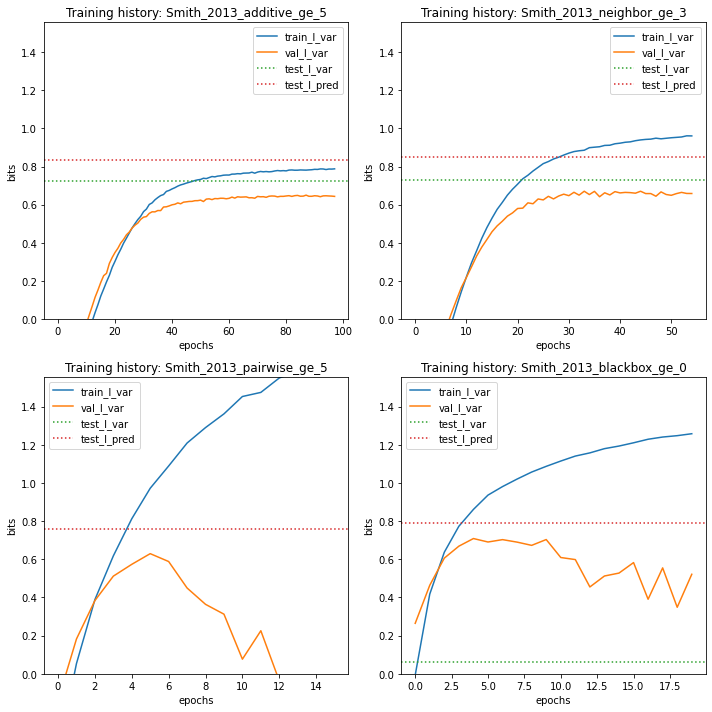

In [8]:
# Create figure and axes for plotting
fig, axs = plt.subplots(2,2,figsize=[10,10])
axs = axs.ravel()

# Loop over models
for ax, name in zip(axs, model_names):
    # Get model
    model = model_dict[name]

    # Plot I_var_train, the variational information on training data as a function of epoch
    ax.plot(model.history['I_var'],
            label=r'train_I_var')

    # Plot I_var_val, the variational information on validation data as a function of epoch
    ax.plot(model.history['val_I_var'],
            label=r'val_I_var')

    # Get part of info_df referring to this model and index by metric
    ix = (info_df['name']==name)
    sub_df = info_df[ix].set_index('metric')
    # Show I_var_test, the variational information of the final model on test data
    ax.axhline(sub_df.loc['I_var','I'], color='C2', linestyle=':',
               label=r'test_I_var')

    # Show I_pred_test, the predictive information of the final model on test data
    ax.axhline(sub_df.loc['I_pred','I'], color='C3', linestyle=':',
               label=r'test_I_pred')

    # Style plot
    ax.set_xlabel('epochs')
    ax.set_ylabel('bits')
    ax.set_title(f'Training history: {name}')
    ax.set_ylim([0, 2*I_pred])
    ax.legend()

# Clean up figure
fig.tight_layout()

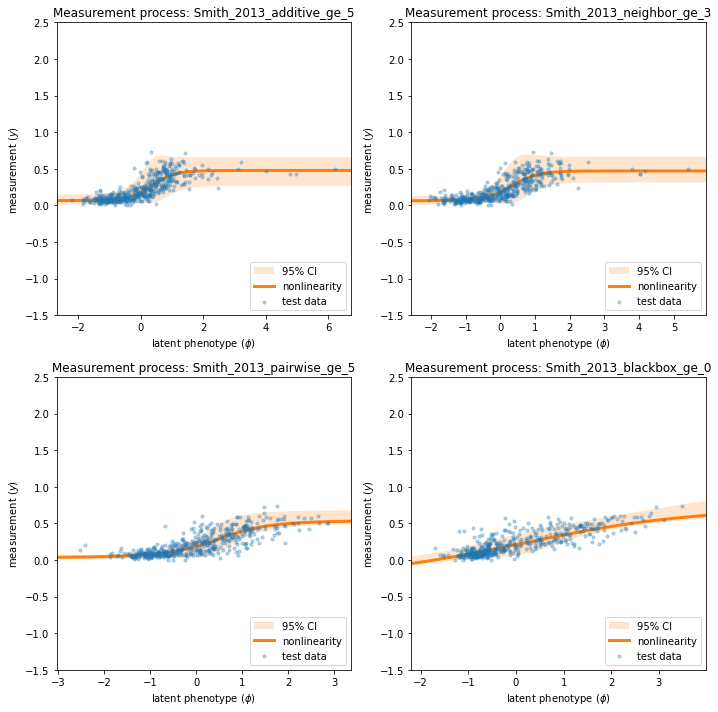

In [9]:
# Create figure and axes for plotting
fig, axs = plt.subplots(2,2,figsize=[10,10])
axs = axs.ravel()

# Loop over models
for ax, name in zip(axs, model_names):

    # Get model
    model = model_dict[name]

    # Get test data y values
    y_test = test_df['Mouse_mean']

    # Compute phi on test data
    phi_test = model.x_to_phi(test_df['Pattern'])

    ## Set phi lims and create a grid in phi space
    phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
    phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

    # Compute yhat for each phi gridpoint
    yhat_grid = model.phi_to_yhat(phi_grid)

    # Compute 95% CI for each yhat
    q = [0.025, 0.975]
    yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

    # Plote 95% confidence interval
    ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                    alpha=0.2, color='C1', lw=0, label='95% CI')

    # Plot GE nonlinearity
    ax.plot(phi_grid, yhat_grid,
            linewidth=3, color='C1', label='nonlinearity')

    # Plot scatter of phi and y values.
    ax.scatter(phi_test, y_test,
               color='C0', s=10, alpha=.3, label='test data', zorder=+100)

    # Style plot
    ax.set_xlim(phi_lim)
    ax.set_xlabel('latent phenotype ($\phi$)')
    ax.set_ylim([-1.5,2.5])
    ax.set_ylabel('measurement ($y$)')
    ax.set_title(f'Measurement process: {name}')
    ax.legend(loc='lower right')

fig.tight_layout()

In [10]:
# Focus on additive model
model = model_dict['Smith_2013_additive_ge_4']

# Retrieve G-P map parameter dict and view dict keys
theta_dict = model.get_theta(gauge="consensus")
theta_dict.keys()

dict_keys(['L', 'C', 'alphabet', 'theta_0', 'theta_lc', 'theta_lclc', 'theta_mlp', 'logomaker_df'])

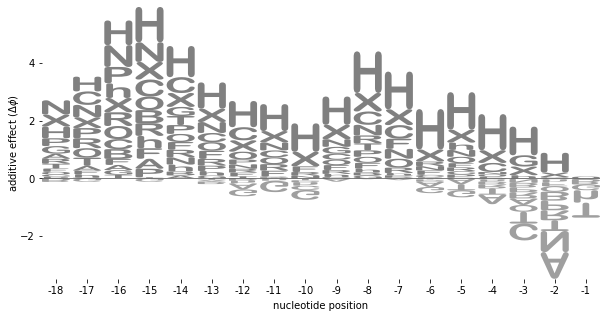

In [11]:
# Get logo dataframe
logo_df = theta_dict['logomaker_df']

# Set NaN parameters to zero
logo_df.fillna(0, inplace=True)

# Create figure
fig, ax = plt.subplots(figsize=[10,5])

# Draw logo
logo = logomaker.Logo(df=logo_df,
                      ax=ax,
                      fade_below=.5,
                      shade_below=.5,
                      width=.9,
                      font_name='Arial Rounded MT Bold')
ylim = ax.get_ylim()

# Highlight positions +1 and +2 to gray to indicate incomplete mutagenesis at these positions
#logo.highlight_position_range(pmin=3, pmax=4, color='w', alpha=1, zorder=10)
#logo.highlight_position_range(pmin=3, pmax=4, color='gray', alpha=.1, zorder=11)

# Create a large `G` at position +1 to indicate that only this base was present in the sequences under consideration
#logo.style_single_glyph(p=3,
#                        c='G',
#                        flip=False,
#                        floor=ylim[0],
#                        ceiling=ylim[1],
#                        color='gray',
#                        zorder=30,
#                        alpha=.5)

# Make 'C' and 'U' at position +2 black
#logo.style_single_glyph(p=4, c='U', color='k', zorder=30, alpha=1)
#logo.style_single_glyph(p=4, c='C', color='k', zorder=30, alpha=.5)

# Style logo
logo.style_spines(visible=False)
#ax.axvline(2.5, linestyle=':', color='k', zorder=30)
ax.set_ylabel('additive effect ($\Delta \phi$)', labelpad=-1)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels([f'{x:+d}' for x in range(-18,0) if x!=0])
ax.set_xlabel('nucleotide position', labelpad=5);

In [118]:
Data_by_replicate = pd.concat([Data[['Pattern', 'Mouse1', 'HepG2rep1']].rename(columns = {'Mouse1':'Mouse', 'HepG2rep1':"HepG2"}), 
                                   Data[['Pattern', 'Mouse2', 'HepG2rep2']].rename(columns = {'Mouse2':'Mouse', 'HepG2rep2':"HepG2"}),
                                   Data[['Pattern', 'Mouse3', 'HepG2rep3']].rename(columns = {'Mouse3':'Mouse', 'HepG2rep3':"HepG2"})])
Data_by_replicate

,Pattern,Mouse,HepG2
0,BBBBBBBBBBBBABBBBB,0.064940,0.140741
1,BBBBBBBBBBBBTBBBBB,0.135108,0.187500
2,BBBBBBBBBBBBNBBBBB,0.074345,0.145215
3,BBBBBBBBBBBBGBBBBB,0.070451,0.144928
4,BBBBBBBBBBBBHBBBBB,0.050399,0.087719
...,...,...,...
4961,PbbXbRbAbbhFbNbbHb,0.521422,0.374449
4962,RbbFAbbPbHbXbbhNbb,0.241722,0.376761
4963,RbbPbNbbXbAbbHbhFb,0.248445,0.343750
4964,XbbRbNbbPbFbhAbbHb,0.278070,0.313559


In [119]:
import random
group = []
for i in range(len(Data_by_replicate)):
    group_num = random.random()
    if group_num < 0.1:
        group.append("test")
    elif group_num < 0.2:
        group.append("validation")
    else:
        group.append("training")
Data_by_replicate['set'] = group

# Get and report sequence length
L = len(Data.loc[0,'Pattern'])
print(f'Sequence length: {L:d} binding sites')

# Split dataset
trainval_df, test_df = mavenn.split_dataset(Data_by_replicate)

Data_file = open("Smith_2013_by_replicate_trainval.pkl", "wb")
pickle.dump(trainval_df, Data_file)
Data_file.close()

Data_file = open("Smith_2013_by_replicate_test.pkl", "wb")
pickle.dump(test_df, Data_file)
Data_file.close()

# Preview trainval_df
print('\ntrainval_df:')
trainval_df

Sequence length: 18 binding sites
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)


trainval_df:


,validation,Pattern,Mouse,HepG2
0,False,BBBBBBBBBBBBABBBBB,0.064940,0.140741
1,False,BBBBBBBBBBBBTBBBBB,0.135108,0.187500
2,False,BBBBBBBBBBBBNBBBBB,0.074345,0.145215
3,False,BBBBBBBBBBBBHBBBBB,0.050399,0.087719
4,True,BBBBBBBBBBBBFBBBBB,0.063894,0.180723
...,...,...,...,...
13427,False,PbbRbAbbXbNbbHbhFb,0.496625,0.494737
13428,False,PbbXbRbAbbhFbNbbHb,0.521422,0.374449
13429,True,RbbPbNbbXbAbbHbhFb,0.248445,0.343750
13430,False,XbbRbNbbPbFbhAbbHb,0.278070,0.313559


In [3]:
Data_file = open("Smith_2013_by_replicate_trainval.pkl", "rb")
trainval_df = pickle.load(Data_file)
Data_file.close()

Data_file = open("Smith_2013_by_replicate_test.pkl", "rb")
test_df = pickle.load(Data_file)
Data_file.close()

In [120]:
# Set default keyword arguments for model.Model()
default_model_kwargs = {
    'L':L,
    'alphabet':list(Site_letters.values()) + ["B", "b"],
    'regression_type':'GE',
    'ge_noise_model_type':'SkewedT',
    'ge_heteroskedasticity_order':2
}

# Set default keyword arguments for model.fit()
default_fit_kwargs = {
    'learning_rate':.001,
    'epochs':500,
    'batch_size':200,
    'early_stopping':True,
    'early_stopping_patience':30,
    'linear_initialization':False,
    'verbose':False
}

# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']
print(f'Training {len(gpmap_types)} models: {gpmap_types}')
for i in range(10):
    for gpmap_type in gpmap_types:

        # Set model name
        model_name = f'Smith_2013_Mouse_{gpmap_type}_ge_{i}'
        print('-----------------------------')
        print(f"Training '{model_name}' model...\n")

        # Copy keyword arguments
        model_kwargs = default_model_kwargs.copy()
        fit_kwargs = default_fit_kwargs.copy()

        # Modify keyword arguments based on G-P map being trained
        # Note: the need for different hyperparameters, such as batch_size
        # and learning_rate, was found by trial and error.
        if gpmap_type=='additive': pass;
        elif gpmap_type=='neighbor': pass;
        elif gpmap_type=='pairwise':
            fit_kwargs['batch_size'] = 50
        elif gpmap_type=='blackbox':
            model_kwargs['gpmap_kwargs'] = {'hidden_layer_sizes':[10]*5,
                                        'features':'pairwise'}
            fit_kwargs['learning_rate'] = 0.0005
            fit_kwargs['batch_size'] = 50
            fit_kwargs['early_stopping_patience'] = 10

        # Instantiate model using the keyword arguments in model_kwargs dict
        model = mavenn.Model(gpmap_type=gpmap_type, **model_kwargs)

        # Set training data
        model.set_data(x=trainval_df['Pattern'],
                       y=trainval_df['Mouse'],
                       validation_flags=trainval_df['validation'])

        # Train model using the keyword arguments in fig_kwargs dict
        model.fit(**fit_kwargs)

        # Compute variational information on test data
        I_var, dI_var =  model.I_variational(x=test_df['Pattern'], y=test_df['Mouse'])
        print(f'test_I_var: {I_var:.3f} +- {dI_var:.3f} bits')

        # Compute predictive information on test data
        I_pred, dI_pred = model.I_predictive(x=test_df['Pattern'], y=test_df['Mouse'])
        print(f'test_I_pred: {I_pred:.3f} +- {dI_pred:.3f} bits')

        # Save model to file
        model.save(model_name)

print('Done!')

Training 4 models: ['additive', 'neighbor', 'pairwise', 'blackbox']
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_0' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.765 sec.


0epoch [00:00, ?epoch/s]

Training time: 38.4 seconds
test_I_var: 0.661 +- 0.042 bits
test_I_pred: 0.803 +- 0.030 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_0.pickle
	Smith_2013_Mouse_additive_ge_0.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_0' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.899 sec.


0epoch [00:00, ?epoch/s]

Training time: 326.7 seconds
test_I_var: 0.725 +- 0.046 bits
test_I_pred: 0.830 +- 0.029 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_0.pickle
	Smith_2013_Mouse_neighbor_ge_0.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_0' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.927 sec.


0epoch [00:00, ?epoch/s]

Training time: 153.4 seconds
test_I_var: 0.918 +- 0.059 bits
test_I_pred: 1.212 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_0.pickle
	Smith_2013_Mouse_pairwise_ge_0.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_0' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.663 sec.


0epoch [00:00, ?epoch/s]

Training time: 146.8 seconds
test_I_var: 0.791 +- 0.083 bits
test_I_pred: 1.231 +- 0.027 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_0.pickle
	Smith_2013_Mouse_blackbox_ge_0.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_1' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.725 sec.


0epoch [00:00, ?epoch/s]

Training time: 39.3 seconds
test_I_var: 0.686 +- 0.041 bits
test_I_pred: 0.785 +- 0.023 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_1.pickle
	Smith_2013_Mouse_additive_ge_1.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_1' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.664 sec.


0epoch [00:00, ?epoch/s]

Training time: 318.7 seconds
test_I_var: 0.733 +- 0.047 bits
test_I_pred: 0.810 +- 0.025 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_1.pickle
	Smith_2013_Mouse_neighbor_ge_1.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_1' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.754 sec.


0epoch [00:00, ?epoch/s]

Training time: 102.5 seconds
test_I_var: 0.945 +- 0.058 bits
test_I_pred: 1.151 +- 0.025 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_1.pickle
	Smith_2013_Mouse_pairwise_ge_1.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_1' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.677 sec.


0epoch [00:00, ?epoch/s]

Training time: 126.5 seconds
test_I_var: 0.772 +- 0.082 bits
test_I_pred: 1.217 +- 0.037 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_1.pickle
	Smith_2013_Mouse_blackbox_ge_1.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_2' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.12 sec.


0epoch [00:00, ?epoch/s]

Training time: 59.8 seconds
test_I_var: 0.678 +- 0.044 bits
test_I_pred: 0.794 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_2.pickle
	Smith_2013_Mouse_additive_ge_2.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_2' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.641 sec.


0epoch [00:00, ?epoch/s]

Training time: 251.5 seconds
test_I_var: 0.721 +- 0.047 bits
test_I_pred: 0.829 +- 0.023 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_2.pickle
	Smith_2013_Mouse_neighbor_ge_2.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_2' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.656 sec.


0epoch [00:00, ?epoch/s]

Training time: 109.2 seconds
test_I_var: 0.940 +- 0.058 bits
test_I_pred: 1.186 +- 0.027 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_2.pickle
	Smith_2013_Mouse_pairwise_ge_2.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_2' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.815 sec.


0epoch [00:00, ?epoch/s]

Training time: 127.2 seconds
test_I_var: 0.783 +- 0.081 bits
test_I_pred: 1.248 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_2.pickle
	Smith_2013_Mouse_blackbox_ge_2.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_3' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.14 sec.


0epoch [00:00, ?epoch/s]

Training time: 37.1 seconds
test_I_var: 0.674 +- 0.042 bits
test_I_pred: 0.790 +- 0.022 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_3.pickle
	Smith_2013_Mouse_additive_ge_3.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_3' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.653 sec.


0epoch [00:00, ?epoch/s]

Training time: 356.3 seconds
test_I_var: 0.740 +- 0.046 bits
test_I_pred: 0.851 +- 0.031 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_3.pickle
	Smith_2013_Mouse_neighbor_ge_3.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_3' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.636 sec.


0epoch [00:00, ?epoch/s]

Training time: 109.3 seconds
test_I_var: 0.928 +- 0.060 bits
test_I_pred: 1.175 +- 0.030 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_3.pickle
	Smith_2013_Mouse_pairwise_ge_3.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_3' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.665 sec.


0epoch [00:00, ?epoch/s]

Training time: 130.5 seconds
test_I_var: 0.858 +- 0.078 bits
test_I_pred: 1.245 +- 0.025 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_3.pickle
	Smith_2013_Mouse_blackbox_ge_3.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_4' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.797 sec.


0epoch [00:00, ?epoch/s]

Training time: 46.6 seconds
test_I_var: 0.653 +- 0.044 bits
test_I_pred: 0.769 +- 0.029 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_4.pickle
	Smith_2013_Mouse_additive_ge_4.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_4' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.808 sec.


0epoch [00:00, ?epoch/s]

Training time: 203.7 seconds
test_I_var: 0.702 +- 0.042 bits
test_I_pred: 0.821 +- 0.022 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_4.pickle
	Smith_2013_Mouse_neighbor_ge_4.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_4' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.67 sec.


0epoch [00:00, ?epoch/s]

Training time: 140.0 seconds
test_I_var: 0.918 +- 0.064 bits
test_I_pred: 1.180 +- 0.031 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_4.pickle
	Smith_2013_Mouse_pairwise_ge_4.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_4' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.666 sec.


0epoch [00:00, ?epoch/s]

Training time: 120.0 seconds
test_I_var: 0.920 +- 0.071 bits
test_I_pred: 1.245 +- 0.028 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_4.pickle
	Smith_2013_Mouse_blackbox_ge_4.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_5' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.685 sec.


0epoch [00:00, ?epoch/s]

Training time: 48.0 seconds
test_I_var: 0.675 +- 0.044 bits
test_I_pred: 0.781 +- 0.028 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_5.pickle
	Smith_2013_Mouse_additive_ge_5.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_5' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.666 sec.


0epoch [00:00, ?epoch/s]

Training time: 258.0 seconds
test_I_var: 0.729 +- 0.048 bits
test_I_pred: 0.810 +- 0.021 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_5.pickle
	Smith_2013_Mouse_neighbor_ge_5.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_5' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.695 sec.


0epoch [00:00, ?epoch/s]

Training time: 117.6 seconds
test_I_var: 0.959 +- 0.063 bits
test_I_pred: 1.181 +- 0.029 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_5.pickle
	Smith_2013_Mouse_pairwise_ge_5.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_5' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.644 sec.


0epoch [00:00, ?epoch/s]

Training time: 122.1 seconds
test_I_var: 0.675 +- 0.093 bits
test_I_pred: 1.251 +- 0.033 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_5.pickle
	Smith_2013_Mouse_blackbox_ge_5.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_6' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.734 sec.


0epoch [00:00, ?epoch/s]

Training time: 47.8 seconds
test_I_var: 0.663 +- 0.046 bits
test_I_pred: 0.824 +- 0.020 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_6.pickle
	Smith_2013_Mouse_additive_ge_6.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_6' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.738 sec.


0epoch [00:00, ?epoch/s]

Training time: 312.8 seconds
test_I_var: 0.707 +- 0.047 bits
test_I_pred: 0.806 +- 0.023 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_6.pickle
	Smith_2013_Mouse_neighbor_ge_6.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_6' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.01 sec.


0epoch [00:00, ?epoch/s]

Training time: 132.2 seconds
test_I_var: 0.915 +- 0.057 bits
test_I_pred: 1.188 +- 0.029 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_6.pickle
	Smith_2013_Mouse_pairwise_ge_6.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_6' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.706 sec.


0epoch [00:00, ?epoch/s]

Training time: 127.9 seconds
test_I_var: 0.728 +- 0.086 bits
test_I_pred: 1.235 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_6.pickle
	Smith_2013_Mouse_blackbox_ge_6.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_7' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.671 sec.


0epoch [00:00, ?epoch/s]

Training time: 64.5 seconds
test_I_var: 0.669 +- 0.042 bits
test_I_pred: 0.823 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_7.pickle
	Smith_2013_Mouse_additive_ge_7.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_7' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.738 sec.


0epoch [00:00, ?epoch/s]

Training time: 302.3 seconds
test_I_var: 0.704 +- 0.047 bits
test_I_pred: 0.802 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_7.pickle
	Smith_2013_Mouse_neighbor_ge_7.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_7' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.717 sec.


0epoch [00:00, ?epoch/s]

Training time: 111.2 seconds
test_I_var: 0.896 +- 0.062 bits
test_I_pred: 1.159 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_7.pickle
	Smith_2013_Mouse_pairwise_ge_7.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_7' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.665 sec.


0epoch [00:00, ?epoch/s]

Training time: 120.2 seconds
test_I_var: 0.756 +- 0.080 bits
test_I_pred: 1.275 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_7.pickle
	Smith_2013_Mouse_blackbox_ge_7.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_8' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.654 sec.


0epoch [00:00, ?epoch/s]

Training time: 41.0 seconds
test_I_var: 0.683 +- 0.041 bits
test_I_pred: 0.769 +- 0.021 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_8.pickle
	Smith_2013_Mouse_additive_ge_8.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_8' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.677 sec.


0epoch [00:00, ?epoch/s]

Training time: 202.2 seconds
test_I_var: 0.750 +- 0.048 bits
test_I_pred: 0.855 +- 0.023 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_8.pickle
	Smith_2013_Mouse_neighbor_ge_8.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_8' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.687 sec.


0epoch [00:00, ?epoch/s]

Training time: 105.7 seconds
test_I_var: 0.965 +- 0.055 bits
test_I_pred: 1.168 +- 0.029 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_8.pickle
	Smith_2013_Mouse_pairwise_ge_8.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_8' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.857 sec.


0epoch [00:00, ?epoch/s]

Training time: 134.5 seconds
test_I_var: 0.807 +- 0.081 bits
test_I_pred: 1.247 +- 0.026 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_8.pickle
	Smith_2013_Mouse_blackbox_ge_8.h5
-----------------------------
Training 'Smith_2013_Mouse_additive_ge_9' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.813 sec.


0epoch [00:00, ?epoch/s]

Training time: 47.2 seconds
test_I_var: 0.676 +- 0.044 bits
test_I_pred: 0.789 +- 0.025 bits
Model saved to these files:
	Smith_2013_Mouse_additive_ge_9.pickle
	Smith_2013_Mouse_additive_ge_9.h5
-----------------------------
Training 'Smith_2013_Mouse_neighbor_ge_9' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.66 sec.


0epoch [00:00, ?epoch/s]

Training time: 272.1 seconds
test_I_var: 0.730 +- 0.047 bits
test_I_pred: 0.827 +- 0.024 bits
Model saved to these files:
	Smith_2013_Mouse_neighbor_ge_9.pickle
	Smith_2013_Mouse_neighbor_ge_9.h5
-----------------------------
Training 'Smith_2013_Mouse_pairwise_ge_9' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.696 sec.


0epoch [00:00, ?epoch/s]

Training time: 152.6 seconds
test_I_var: 0.903 +- 0.058 bits
test_I_pred: 1.176 +- 0.021 bits
Model saved to these files:
	Smith_2013_Mouse_pairwise_ge_9.pickle
	Smith_2013_Mouse_pairwise_ge_9.h5
-----------------------------
Training 'Smith_2013_Mouse_blackbox_ge_9' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.66 sec.


0epoch [00:00, ?epoch/s]

Training time: 126.1 seconds
test_I_var: 0.789 +- 0.082 bits
test_I_pred: 1.220 +- 0.025 bits
Model saved to these files:
	Smith_2013_Mouse_blackbox_ge_9.pickle
	Smith_2013_Mouse_blackbox_ge_9.h5
Done!


In [161]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names
model_names = [f'Smith_2013_Mouse_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(10)]

# Load models into a dictionary indexed by model name
model_dict = {name:mavenn.load(name) for name in model_names}

Model loaded from these files:
	Smith_2013_Mouse_additive_ge_0.pickle
	Smith_2013_Mouse_additive_ge_0.h5
Model loaded from these files:
	Smith_2013_Mouse_additive_ge_1.pickle
	Smith_2013_Mouse_additive_ge_1.h5
Model loaded from these files:
	Smith_2013_Mouse_additive_ge_2.pickle
	Smith_2013_Mouse_additive_ge_2.h5
Model loaded from these files:
	Smith_2013_Mouse_additive_ge_3.pickle
	Smith_2013_Mouse_additive_ge_3.h5
Model loaded from these files:
	Smith_2013_Mouse_additive_ge_4.pickle
	Smith_2013_Mouse_additive_ge_4.h5
Model loaded from these files:
	Smith_2013_Mouse_additive_ge_5.pickle
	Smith_2013_Mouse_additive_ge_5.h5
Model loaded from these files:
	Smith_2013_Mouse_additive_ge_6.pickle
	Smith_2013_Mouse_additive_ge_6.h5
Model loaded from these files:
	Smith_2013_Mouse_additive_ge_7.pickle
	Smith_2013_Mouse_additive_ge_7.h5
Model loaded from these files:
	Smith_2013_Mouse_additive_ge_8.pickle
	Smith_2013_Mouse_additive_ge_8.h5
Model loaded from these files:
	Smith_2013_Mouse_additi

/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/1576020214.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/1576020214.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/1576020214.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/1576020214.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

Contents of info_df:
                             name     gpmap  metric         I        dI
0  Smith_2013_Mouse_additive_ge_0  additive  I_pred  0.812515  0.023630
1  Smith_2013_Mouse_neighbor_ge_3  neighbor  I_pred  0.885101  0.030210
2  Smith_2013_Mouse_pairwise_ge_0  pairwise  I_pred  1.188841  0.030166
3  Smith_2013_Mouse_blackbox_ge_2  blackbox  I_pred  1.267718  0.021946
4 4


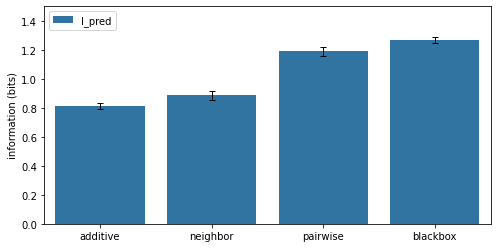

In [162]:
# Fill out dataframe containing values to plot
# This dataframe will then be used by seaborn's barplot() function
info_df = pd.DataFrame(columns=['name', 'gpmap', 'metric', 'I', 'dI'])
model_names = []
for gpmap_type in gpmap_types:
    for i in range(10):

        # Get model
        name = f'Smith_2013_Mouse_{gpmap_type}_ge_{i}'
        model = model_dict[name]

        # Compute variational information on test data
        I_var, dI_var =  model.I_variational(x=test_df['Pattern'], y=test_df['Mouse'])
        var_row = {'name':name,
               'gpmap':gpmap_type,
               'metric':'I_var',
               'I':I_var,
               'dI':dI_var}

        # Compute predictive information on test data
        I_pred, dI_pred = model.I_predictive(x=test_df['Pattern'], y=test_df['Mouse'])
        pred_row = {'name':name,
               'gpmap':gpmap_type,
               'metric':'I_pred',
               'I':I_pred,
               'dI':dI_pred}
        if i == 0:
            #info_df = info_df.append(var_row, ignore_index=True)
            info_df = info_df.append(pred_row, ignore_index=True)
            model_names.append(name)
        elif I_pred > info_df['I'][len(info_df['I']) - 1]:
            #info_df.iloc[len(info_df) - 2] = var_row
            info_df.iloc[len(info_df) - 1] = pred_row
            model_names[-1] = name

# Print dataframe
print('Contents of info_df:', info_df, sep='\n')

# Create figure
fig, ax = plt.subplots(figsize=[8, 4])

# Plot bars
sns.barplot(ax=ax,
            data=info_df,
            hue='metric',
            x='gpmap',
            y='I')

# Plot errorbars
x = np.linspace(0, 3, 4) #np.array([[x-.2,x+.2] for x in range(4)]).ravel()
print(len(x), len(info_df['I'].values))
ax.errorbar(x=x,
            y=info_df['I'].values,
            yerr=info_df['dI'].values,
            color='k', capsize=3, linestyle='none',
            elinewidth=1, capthick=1, solid_capstyle='round')

ax.set_ylabel('information (bits)')
ax.set_xlabel('')
ax.set_xlim([-.5, 3.5])
ax.set_ylim([0, 1.5])
ax.legend(loc='upper left')

KeyError: 'I_var'

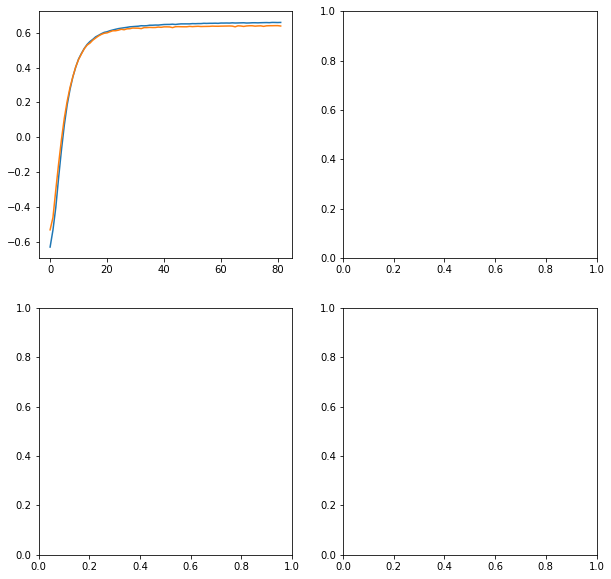

In [163]:
# Create figure and axes for plotting
fig, axs = plt.subplots(2,2,figsize=[10,10])
axs = axs.ravel()

# Loop over models
for ax, name in zip(axs, model_names):
    # Get model
    model = model_dict[name]

    # Plot I_var_train, the variational information on training data as a function of epoch
    ax.plot(model.history['I_var'],
            label=r'train_I_var')

    # Plot I_var_val, the variational information on validation data as a function of epoch
    ax.plot(model.history['val_I_var'],
            label=r'val_I_var')

    # Get part of info_df referring to this model and index by metric
    ix = (info_df['name']==name)
    sub_df = info_df[ix].set_index('metric')
    # Show I_var_test, the variational information of the final model on test data
    ax.axhline(sub_df.loc['I_var','I'], color='C2', linestyle=':',
               label=r'test_I_var')

    # Show I_pred_test, the predictive information of the final model on test data
    ax.axhline(sub_df.loc['I_pred','I'], color='C3', linestyle=':',
               label=r'test_I_pred')

    # Style plot
    ax.set_xlabel('epochs')
    ax.set_ylabel('bits')
    ax.set_title(f'Training history: {name}')
    ax.set_ylim([0, 2*I_pred])
    ax.legend()

# Clean up figure
fig.tight_layout()

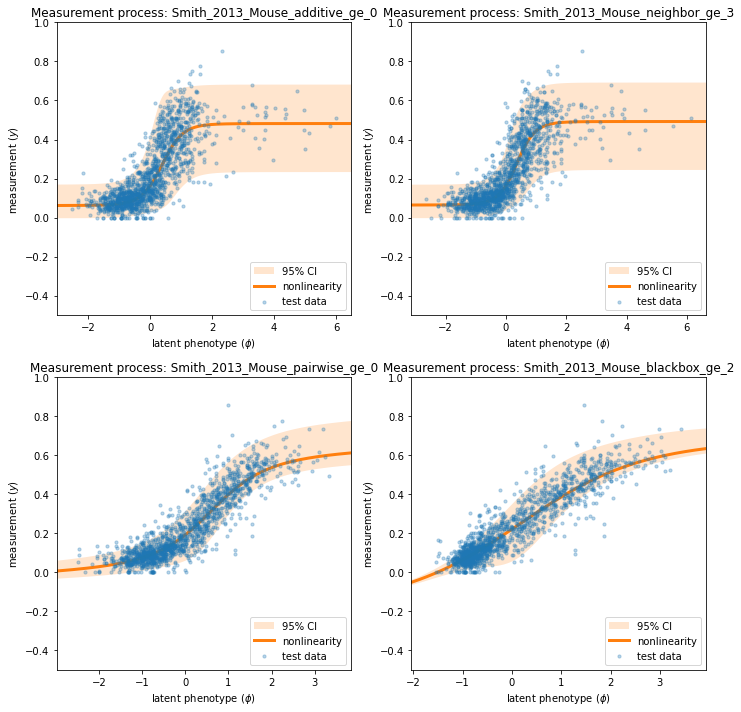

In [164]:
# Create figure and axes for plotting
fig, axs = plt.subplots(2,2,figsize=[10,10])
axs = axs.ravel()

# Loop over models
for ax, name in zip(axs, model_names):

    # Get model
    model = model_dict[name]

    # Get test data y values
    y_test = test_df['Mouse']

    # Compute phi on test data
    phi_test = model.x_to_phi(test_df['Pattern'])

    ## Set phi lims and create a grid in phi space
    phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
    phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

    # Compute yhat for each phi gridpoint
    yhat_grid = model.phi_to_yhat(phi_grid)

    # Compute 95% CI for each yhat
    q = [0.025, 0.975]
    yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

    # Plote 95% confidence interval
    ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                    alpha=0.2, color='C1', lw=0, label='95% CI')

    # Plot GE nonlinearity
    ax.plot(phi_grid, yhat_grid,
            linewidth=3, color='C1', label='nonlinearity')

    # Plot scatter of phi and y values.
    ax.scatter(phi_test, y_test,
               color='C0', s=10, alpha=.3, label='test data', zorder=+100)

    # Style plot
    ax.set_xlim(phi_lim)
    ax.set_xlabel('latent phenotype ($\phi$)')
    ax.set_ylim([-0.5,1])
    ax.set_ylabel('measurement ($y$)')
    ax.set_title(f'Measurement process: {name}')
    ax.legend(loc='lower right')

fig.tight_layout()

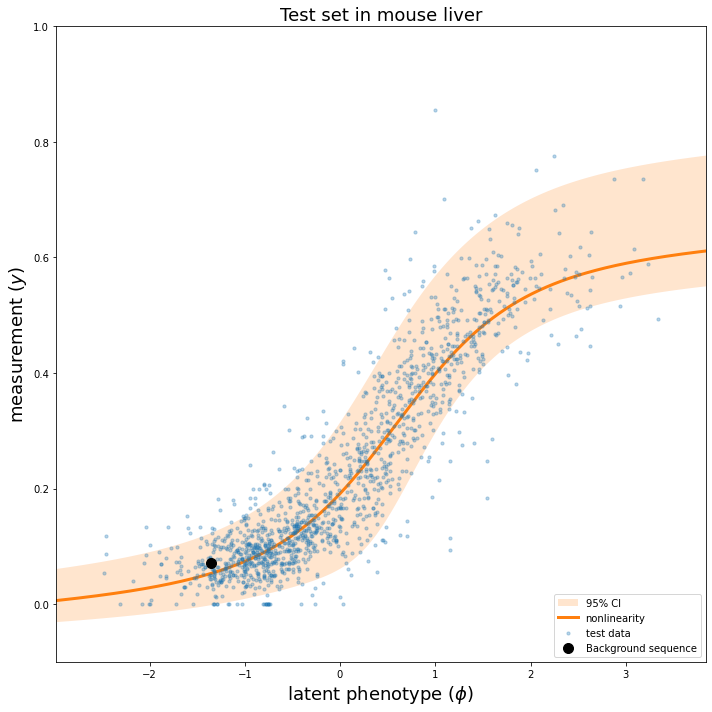

In [165]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[10,10])
#axs = axs.ravel()

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = 'Smith_2013_Mouse_pairwise_ge_0'
# Get model
model = model_dict[name]

# Get test data y values
y_test = test_df['Mouse']

# Compute phi on test data
phi_test = model.x_to_phi(test_df['Pattern'])

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.2, color='C1', lw=0, label='95% CI')

# Plot GE nonlinearity
ax.plot(phi_grid, yhat_grid,
        linewidth=3, color='C1', label='nonlinearity')

# Plot scatter of phi and y values.
ax.scatter(phi_test, y_test,
            color='C0', s=10, alpha=.3, label='test data', zorder=+100)

# Plot basal
ax.scatter(model.x_to_phi('bbbbbbbbbbbbbbbbbb'), test_df['Mouse'][0],
            color='black', s=100, alpha=1, label='Background sequence', zorder=+100)

# Style plot
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)', fontsize = 18)
ax.set_ylim([-0.1,1])
ax.set_ylabel('measurement ($y$)', fontsize = 18)
ax.set_title(f'Test set in mouse liver', fontsize = 18)
ax.legend(loc='lower right')

fig.tight_layout()

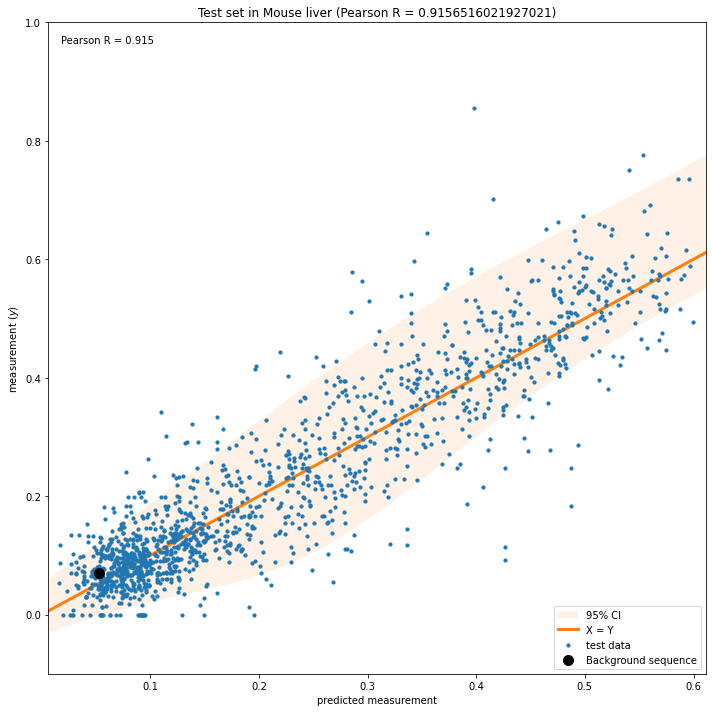

In [166]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[10,10])
#axs = axs.ravel()

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = 'Smith_2013_Mouse_pairwise_ge_0'
# Get model
model = model_dict[name]

# Get test data y values
y_test = test_df['Mouse']

# Compute phi on test data
phi_test = model.x_to_phi(test_df['Pattern'])
yhat_test = model.phi_to_yhat(phi_test)

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(yhat_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.1, color='C1', lw=0, label='95% CI')

# Plot x=y
ax.plot(yhat_grid, yhat_grid,
        linewidth=3, color='C1', label='X = Y')

# Plot scatter of yhat and y values.
ax.scatter(yhat_test, y_test,
            color='C0', s=10, alpha=1, label='test data', zorder=+100)

# Plot basal
ax.scatter(model.phi_to_yhat(model.x_to_phi('bbbbbbbbbbbbbbbbbb')), test_df['Mouse'][0],
            color='black', s=100, alpha=1, label='Background sequence', zorder=+100)

# Style plot
ax.set_xlim([min(yhat_grid), max(yhat_grid)])
ax.set_xlabel('predicted measurement')
ax.set_ylim([-0.1,1])
ax.set_ylabel('measurement ($y$)')
ax.set_title(f'Test set in Mouse liver (Pearson R = ' + str(scipy.stats.pearsonr(yhat_test, y_test)[0]) + ")")
ax.text(0.02,0.98, "Pearson R = " + str(scipy.stats.pearsonr(yhat_test, y_test)[0])[0:5], ha="left", va="top", transform=ax.transAxes)
ax.legend(loc='lower right')

fig.tight_layout()

In [167]:
# Focus on pairwise model
model = model_dict['Smith_2013_Mouse_pairwise_ge_0']

# Retrieve G-P map parameter dict and view dict keys
theta_dict = model.get_theta(gauge="consensus")
theta_dict.keys()

dict_keys(['L', 'C', 'alphabet', 'theta_0', 'theta_lc', 'theta_lclc', 'theta_mlp', 'logomaker_df'])

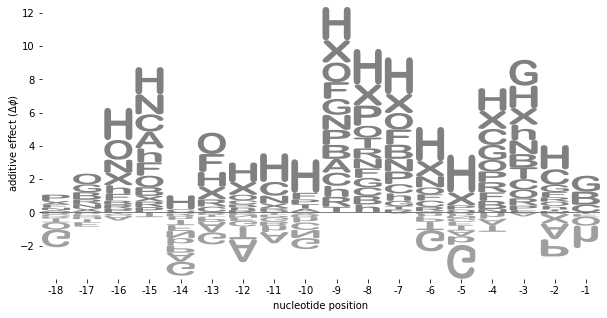

In [168]:
# Get logo dataframe
logo_df = theta_dict['logomaker_df']

# Set NaN parameters to zero
logo_df.fillna(0, inplace=True)

# Create figure
fig, ax = plt.subplots(figsize=[10,5])

# Draw logo
logo = logomaker.Logo(df=logo_df,
                      ax=ax,
                      fade_below=.5,
                      shade_below=.5,
                      width=.9,
                      font_name='Arial Rounded MT Bold')
ylim = ax.get_ylim()

# Highlight positions +1 and +2 to gray to indicate incomplete mutagenesis at these positions
#logo.highlight_position_range(pmin=3, pmax=4, color='w', alpha=1, zorder=10)
#logo.highlight_position_range(pmin=3, pmax=4,color='gray', alpha=.1, zorder=11)

# Create a large `G` at position +1 to indicate that only this base was present in the sequences under consideration
#logo.style_single_glyph(p=3,
#                        c='G',
#                        flip=False,
#                        floor=ylim[0],
#                        ceiling=ylim[1],
#                        color='gray',
#                        zorder=30,
#                        alpha=.5)

# Make 'C' and 'U' at position +2 black
#logo.style_single_glyph(p=4, c='U', color='k', zorder=30, alpha=1)
#logo.style_single_glyph(p=4, c='C', color='k', zorder=30, alpha=.5)

# Style logo
logo.style_spines(visible=False)
#ax.axvline(2.5, linestyle=':', color='k', zorder=30)
ax.set_ylabel('additive effect ($\Delta \phi$)', labelpad=-1)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels([f'{x:+d}' for x in range(-18,0) if x!=0])
ax.set_xlabel('nucleotide position', labelpad=5);

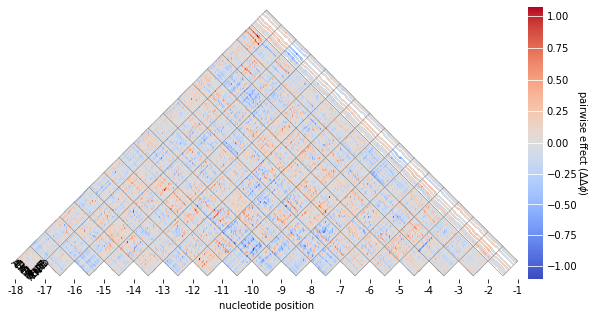

In [169]:
Site_letters = {"V_AHRARNT_02": "A", "V_CEBP_Q2_01": "C", "V_HNF3ALPHA_Q6": "F", "V_GATA4_Q3": "G", 
                "V_HNF1_C": "H", "V_HNF4_Q6": "h","V_COUPTF_Q6": "N", "V_HNF6_Q6": "O", "V_PPARA_02": "P", 
                "V_Rxra_UP": "R", "V_AP2GAMMA_01": "T", "V_XBP1_01": "X"}

# Get pairwise parameters from theta_dict
theta_lclc = theta_dict['theta_lclc']

# Create fig and ax objects
fig, ax = plt.subplots(figsize=[10,5])

# Draw heatmap
ax, cb = mavenn.heatmap_pairwise(values=theta_lclc,
                                 alphabet=list(Site_letters.values()) + ["B", "b"],
                                 ax=ax,
                                 gpmap_type='pairwise',
                                 cmap_size='3%')

# Style heatmap
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels([f'{x:+d}' for x in range(-18,0) if x!=0])
ax.set_xlabel('nucleotide position', labelpad=5);

# Style colorbar
cb.set_label('pairwise effect ($\Delta \Delta \phi$)',
             labelpad=5, ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')

In [170]:
TF_TF_interactions = np.zeros((14, 14))
for i, site1 in enumerate(theta_dict['theta_lclc']):
    if i < 18:
        for j, TF1 in enumerate(site1):
            if j < 14:
                for k, site2 in enumerate(TF1[(i + 1):(len(TF1) - 1)]):
                    #print(k, site2[0:8])
                    TF_TF_interactions[j] = TF_TF_interactions[j] + site2[0:14]
        #print(i, TF1[(i + 1):(len(TF1[0]) - 1)])
        #print(i, TF1[(i + 1):(len(site[0]) - 1)])
        
TF_TF_interactions

array([[ 4.21036431e+00,  2.87770060e-01,  5.90587054e-01,
         3.15529654e+00, -3.96006442e+00, -7.08695998e-01,
         1.48680369e+00,  1.00158490e-01,  2.12066762e+00,
        -3.65223045e-01,  2.64651275e+00,  2.13556565e+00,
        -7.41684887e-01,  1.88338064e+00],
       [ 1.27549333e+00, -4.90671506e+00, -1.95740077e+00,
        -5.95954090e-01, -1.18337295e+01, -3.21261414e+00,
        -4.16506434e+00, -3.64542277e+00, -1.41366709e+00,
        -1.06127724e+00, -1.59385846e-01, -1.99031998e+00,
        -1.79721280e+00,  6.08141199e-01],
       [-8.71240163e-01, -2.87756915e+00, -8.51307494e+00,
        -1.00426684e-02, -3.50382978e+00, -2.15700184e+00,
         1.12378392e+00, -3.39822705e-01, -3.10946482e+00,
         1.30843818e+00, -5.18826461e-01,  1.54539710e+00,
        -1.71106500e+00,  1.30902714e+00],
       [ 5.10870725e+00,  3.69733356e-01,  1.87581316e+00,
         4.36837356e+00, -8.00051562e+00,  6.20599782e-01,
        -3.31850413e-01, -1.52655970e-02,  2.

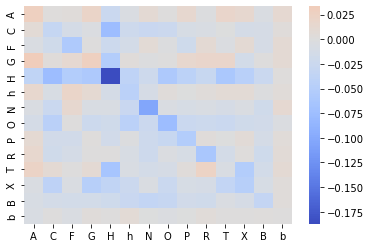

In [171]:
import seaborn as sns
sns.heatmap(TF_TF_interactions/(18*17/2), cmap = 'coolwarm', center = 0, xticklabels = list(Site_letters.values()) + ["B", "b"], yticklabels = list(Site_letters.values()) + ["B", "b"])
plt.show()

In [172]:
Site_letters

{'V_AHRARNT_02': 'A',
 'V_CEBP_Q2_01': 'C',
 'V_HNF3ALPHA_Q6': 'F',
 'V_GATA4_Q3': 'G',
 'V_HNF1_C': 'H',
 'V_HNF4_Q6': 'h',
 'V_COUPTF_Q6': 'N',
 'V_HNF6_Q6': 'O',
 'V_PPARA_02': 'P',
 'V_Rxra_UP': 'R',
 'V_AP2GAMMA_01': 'T',
 'V_XBP1_01': 'X'}

In [173]:
Data_file = open("Smith_2013_by_replicate_trainval.pkl", "rb")
trainval_df = pickle.load(Data_file)
Data_file.close()

Data_file = open("Smith_2013_by_replicate_test.pkl", "rb")
test_df = pickle.load(Data_file)
Data_file.close()

Data_df = pd.DataFrame()
Data_df['x'] = pd.concat([trainval_df['Pattern'], test_df['Pattern']])
assignments = []
for validation in trainval_df['validation']:
    if validation:
        assignments.append('validation')
    else:
        assignments.append('training')
assignments = assignments + ['test']*len(test_df)
Data_df['set'] = assignments
Data_df

,x,set
0,BBBBBBBBBBBBABBBBB,training
1,BBBBBBBBBBBBTBBBBB,training
2,BBBBBBBBBBBBNBBBBB,training
3,BBBBBBBBBBBBHBBBBB,training
4,BBBBBBBBBBBBFBBBBB,validation
...,...,...
1461,PbbAbXbHbbhNbbRbFb,test
1462,RbbONbbHbXbbhAbPbb,test
1463,RbbXbOPbbNbbHbhAbb,test
1464,PbbHbFbAbRbXbbNbhb,test


In [174]:
name = 'Smith_2013_Mouse_pairwise_ge_0'

# Get model
model = model_dict[name]

Smith_2013_mouse_bootstrap_models = model.bootstrap(Data_df, num_models = 20)

Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 0 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.836 sec.


0epoch [00:00, ?epoch/s]

Training time: 264.1 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 1 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.549 sec.


0epoch [00:00, ?epoch/s]

Training time: 331.6 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 2 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.57 sec.


0epoch [00:00, ?epoch/s]

Training time: 266.2 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 3 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.634 sec.


0epoch [00:00, ?epoch/s]

Training time: 291.4 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 4 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.16 sec.


0epoch [00:00, ?epoch/s]

Training time: 287.4 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 5 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.25 sec.


0epoch [00:00, ?epoch/s]

Training time: 225.2 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 6 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.487 sec.


0epoch [00:00, ?epoch/s]

Training time: 228.5 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 7 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.63 sec.


0epoch [00:00, ?epoch/s]

Training time: 229.8 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 8 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.01 sec.


0epoch [00:00, ?epoch/s]

Training time: 225.8 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 9 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.666 sec.


0epoch [00:00, ?epoch/s]

Training time: 231.3 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 10 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.976 sec.


0epoch [00:00, ?epoch/s]

Training time: 274.9 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 11 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.515 sec.


0epoch [00:00, ?epoch/s]

Training time: 252.1 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 12 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.832 sec.


0epoch [00:00, ?epoch/s]

Training time: 241.3 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 13 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.858 sec.


0epoch [00:00, ?epoch/s]

Training time: 251.7 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 14 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.697 sec.


0epoch [00:00, ?epoch/s]

Training time: 204.3 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 15 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.508 sec.


0epoch [00:00, ?epoch/s]

Training time: 212.2 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 16 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.818 sec.


0epoch [00:00, ?epoch/s]

Training time: 280.5 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 17 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.728 sec.


0epoch [00:00, ?epoch/s]

Training time: 240.0 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 18 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.1 sec.


0epoch [00:00, ?epoch/s]

Training time: 202.7 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 19 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.912 sec.


0epoch [00:00, ?epoch/s]

Training time: 282.3 seconds


NameError: name 'bootstrap_models' is not defined

In [176]:
for i, model in enumerate(Smith_2013_mouse_bootstrap_models):
    model_name = "Smith_2013_mouse_bootstrap_" + str(i)
    model.save(model_name)

Model saved to these files:
	Smith_2013_mouse_bootstrap_0.pickle
	Smith_2013_mouse_bootstrap_0.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_1.pickle
	Smith_2013_mouse_bootstrap_1.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_2.pickle
	Smith_2013_mouse_bootstrap_2.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_3.pickle
	Smith_2013_mouse_bootstrap_3.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_4.pickle
	Smith_2013_mouse_bootstrap_4.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_5.pickle
	Smith_2013_mouse_bootstrap_5.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_6.pickle
	Smith_2013_mouse_bootstrap_6.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_7.pickle
	Smith_2013_mouse_bootstrap_7.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_8.pickle
	Smith_2013_mouse_bootstrap_8.h5
Model saved to these files:
	Smith_2013_mouse_bootstrap_9.pickle
	Smith_2013_mouse_bootstrap_9.h5
Model saved to these

In [177]:
# Load bootstrap models
model_names = ["Smith_2013_mouse_bootstrap_" + str(i) for i in range(20)]
Smith_2013_mouse_bootstrap_models = [mavenn.load(name) for name in model_names]

Model loaded from these files:
	Smith_2013_mouse_bootstrap_0.pickle
	Smith_2013_mouse_bootstrap_0.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_1.pickle
	Smith_2013_mouse_bootstrap_1.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_2.pickle
	Smith_2013_mouse_bootstrap_2.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_3.pickle
	Smith_2013_mouse_bootstrap_3.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_4.pickle
	Smith_2013_mouse_bootstrap_4.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_5.pickle
	Smith_2013_mouse_bootstrap_5.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_6.pickle
	Smith_2013_mouse_bootstrap_6.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_7.pickle
	Smith_2013_mouse_bootstrap_7.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_8.pickle
	Smith_2013_mouse_bootstrap_8.h5
Model loaded from these files:
	Smith_2013_mouse_bootstrap_9.pickle
	Smith_2013_mouse_boots

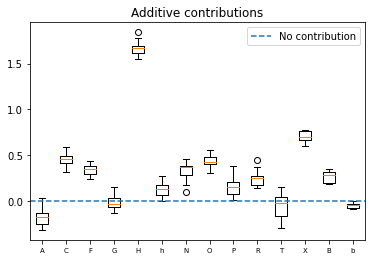

In [178]:
Additive_contributions = []
for model in Smith_2013_mouse_bootstrap_models:
    theta_dict = model.get_theta(gauge="consensus")
    logo_df = theta_dict['logomaker_df']
    Additive_contributions.append(np.asarray(logo_df.mean()))

#Additive_contributions
plt.boxplot(np.asarray(Additive_contributions))
x = np.linspace(1, 14, 14)
plt.xticks(x, list(Site_letters.values()) + ["B", "b"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No contribution")
plt.legend()
plt.title("Additive contributions")
plt.show()

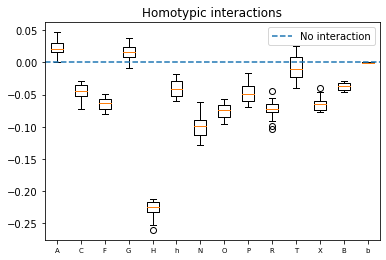

In [179]:
Interactions = []
for model in Smith_2013_mouse_bootstrap_models:
    theta_dict = model.get_theta(gauge="consensus")
    Interactions.append([])
    for i in range(14):
        All_interactions = theta_dict['theta_lclc'][:, i, :, i].flatten()
        Interactions[-1].append(np.mean(All_interactions[np.logical_not(np.isnan(All_interactions))]))

plt.boxplot(np.asarray(Interactions))
x = np.linspace(1, 14, 14)
plt.xticks(x, list(Site_letters.values()) + ["B", "b"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No interaction")
plt.legend()
plt.title("Homotypic interactions")
plt.show()

In [180]:
Additive_errorbars = []
for i in range(14):
    Additive_errorbars.append(np.std(np.asarray(Additive_contributions)[:, i]))

Interaction_errorbars = []
for i in range(14):
    Interaction_errorbars.append(np.std(np.asarray(Interactions)[:, i]))

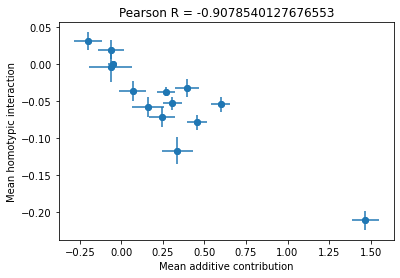

In [181]:
# Focus on pairwise model
model = model_dict['Smith_2013_Mouse_pairwise_ge_0']

# Retrieve G-P map parameter dict and view dict keys
theta_dict = model.get_theta(gauge="consensus")
theta_dict.keys()

import scipy.stats
logo_df = theta_dict['logomaker_df']
Additive_contributions = np.asarray(logo_df.mean())

Interactions = []
for i in range(14):
    All_interactions = theta_dict['theta_lclc'][:, i, :, i].flatten()
    Interactions.append(np.mean(All_interactions[np.logical_not(np.isnan(All_interactions))]))

plt.scatter(Additive_contributions, Interactions)
plt.errorbar(Additive_contributions, Interactions, xerr = Additive_errorbars, yerr = Interaction_errorbars, fmt = "o")
plt.xlabel("Mean additive contribution")
plt.ylabel("Mean homotypic interaction")
plt.title("Pearson R = " + str(scipy.stats.pearsonr(Additive_contributions, Interactions)[0]))
plt.show()

In [133]:
trainval_df

,validation,Pattern,Mouse,HepG2
0,False,BBBBBBBBBBBBABBBBB,0.064940,0.140741
1,False,BBBBBBBBBBBBTBBBBB,0.135108,0.187500
2,False,BBBBBBBBBBBBNBBBBB,0.074345,0.145215
3,False,BBBBBBBBBBBBHBBBBB,0.050399,0.087719
4,True,BBBBBBBBBBBBFBBBBB,0.063894,0.180723
...,...,...,...,...
13427,False,PbbRbAbbXbNbbHbhFb,0.496625,0.494737
13428,False,PbbXbRbAbbhFbNbbHb,0.521422,0.374449
13429,True,RbbPbNbbXbAbbHbhFb,0.248445,0.343750
13430,False,XbbRbNbbPbFbhAbbHb,0.278070,0.313559


In [134]:
# Set default keyword arguments for model.Model()
default_model_kwargs = {
    'L':L,
    'alphabet':list(Site_letters.values()) + ["B", "b"],
    'regression_type':'GE',
    'ge_noise_model_type':'SkewedT',
    'ge_heteroskedasticity_order':2
}

# Set default keyword arguments for model.fit()
default_fit_kwargs = {
    'learning_rate':.001,
    'epochs':500,
    'batch_size':200,
    'early_stopping':True,
    'early_stopping_patience':30,
    'linear_initialization':False,
    'verbose':False
}

# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']
print(f'Training {len(gpmap_types)} models: {gpmap_types}')
for i in range(10):
    for gpmap_type in gpmap_types:

        # Set model name
        model_name = f'Smith_2013_HepG2_{gpmap_type}_ge_{i}'
        print('-----------------------------')
        print(f"Training '{model_name}' model...\n")

        # Copy keyword arguments
        model_kwargs = default_model_kwargs.copy()
        fit_kwargs = default_fit_kwargs.copy()

        # Modify keyword arguments based on G-P map being trained
        # Note: the need for different hyperparameters, such as batch_size
        # and learning_rate, was found by trial and error.
        if gpmap_type=='additive': pass;
        elif gpmap_type=='neighbor': pass;
        elif gpmap_type=='pairwise':
            fit_kwargs['batch_size'] = 50
        elif gpmap_type=='blackbox':
            model_kwargs['gpmap_kwargs'] = {'hidden_layer_sizes':[10]*5,
                                        'features':'pairwise'}
            fit_kwargs['learning_rate'] = 0.0005
            fit_kwargs['batch_size'] = 50
            fit_kwargs['early_stopping_patience'] = 10

        # Instantiate model using the keyword arguments in model_kwargs dict
        model = mavenn.Model(gpmap_type=gpmap_type, **model_kwargs)

        # Set training data
        model.set_data(x=trainval_df['Pattern'],
                       y=trainval_df['HepG2'],
                       validation_flags=trainval_df['validation'])

        # Train model using the keyword arguments in fig_kwargs dict
        model.fit(**fit_kwargs)

        # Compute variational information on test data
        I_var, dI_var =  model.I_variational(x=test_df['Pattern'], y=test_df['HepG2'])
        print(f'test_I_var: {I_var:.3f} +- {dI_var:.3f} bits')

        # Compute predictive information on test data
        I_pred, dI_pred = model.I_predictive(x=test_df['Pattern'], y=test_df['HepG2'])
        print(f'test_I_pred: {I_pred:.3f} +- {dI_pred:.3f} bits')

        # Save model to file
        model.save(model_name)

print('Done!')

Training 4 models: ['additive', 'neighbor', 'pairwise', 'blackbox']
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_0' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.848 sec.


0epoch [00:00, ?epoch/s]

Training time: 42.6 seconds
test_I_var: 0.479 +- 0.048 bits
test_I_pred: 0.606 +- 0.026 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_0.pickle
	Smith_2013_HepG2_additive_ge_0.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_0' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.646 sec.


0epoch [00:00, ?epoch/s]

Training time: 297.4 seconds
test_I_var: 0.601 +- 0.041 bits
test_I_pred: 0.653 +- 0.024 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_0.pickle
	Smith_2013_HepG2_neighbor_ge_0.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_0' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.749 sec.


0epoch [00:00, ?epoch/s]

Training time: 120.9 seconds
test_I_var: 0.662 +- 0.053 bits
test_I_pred: 0.928 +- 0.027 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_0.pickle
	Smith_2013_HepG2_pairwise_ge_0.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_0' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.57 sec.


0epoch [00:00, ?epoch/s]

Training time: 151.1 seconds
test_I_var: 0.631 +- 0.058 bits
test_I_pred: 0.943 +- 0.025 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_0.pickle
	Smith_2013_HepG2_blackbox_ge_0.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_1' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.711 sec.


0epoch [00:00, ?epoch/s]

Training time: 56.2 seconds
test_I_var: 0.520 +- 0.041 bits
test_I_pred: 0.599 +- 0.030 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_1.pickle
	Smith_2013_HepG2_additive_ge_1.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_1' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.65 sec.


0epoch [00:00, ?epoch/s]

Training time: 246.6 seconds
test_I_var: 0.563 +- 0.044 bits
test_I_pred: 0.689 +- 0.028 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_1.pickle
	Smith_2013_HepG2_neighbor_ge_1.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_1' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.784 sec.


0epoch [00:00, ?epoch/s]

Training time: 105.9 seconds
test_I_var: 0.736 +- 0.048 bits
test_I_pred: 0.920 +- 0.022 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_1.pickle
	Smith_2013_HepG2_pairwise_ge_1.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_1' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.655 sec.


0epoch [00:00, ?epoch/s]

Training time: 135.4 seconds
test_I_var: 0.445 +- 0.076 bits
test_I_pred: 0.935 +- 0.034 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_1.pickle
	Smith_2013_HepG2_blackbox_ge_1.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_2' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.909 sec.


0epoch [00:00, ?epoch/s]

Training time: 39.0 seconds
test_I_var: 0.497 +- 0.045 bits
test_I_pred: 0.589 +- 0.026 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_2.pickle
	Smith_2013_HepG2_additive_ge_2.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_2' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.709 sec.


0epoch [00:00, ?epoch/s]

Training time: 299.5 seconds
test_I_var: 0.584 +- 0.044 bits
test_I_pred: 0.655 +- 0.028 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_2.pickle
	Smith_2013_HepG2_neighbor_ge_2.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_2' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.872 sec.


0epoch [00:00, ?epoch/s]

Training time: 103.8 seconds
test_I_var: 0.737 +- 0.048 bits
test_I_pred: 0.908 +- 0.027 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_2.pickle
	Smith_2013_HepG2_pairwise_ge_2.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_2' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.681 sec.


0epoch [00:00, ?epoch/s]

Training time: 207.6 seconds
test_I_var: 0.388 +- 0.084 bits
test_I_pred: 0.953 +- 0.023 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_2.pickle
	Smith_2013_HepG2_blackbox_ge_2.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_3' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.755 sec.


0epoch [00:00, ?epoch/s]

Training time: 46.2 seconds
test_I_var: 0.479 +- 0.038 bits
test_I_pred: 0.590 +- 0.026 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_3.pickle
	Smith_2013_HepG2_additive_ge_3.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_3' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.721 sec.


0epoch [00:00, ?epoch/s]

Training time: 351.0 seconds
test_I_var: 0.573 +- 0.044 bits
test_I_pred: 0.686 +- 0.026 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_3.pickle
	Smith_2013_HepG2_neighbor_ge_3.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_3' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.703 sec.


0epoch [00:00, ?epoch/s]

Training time: 117.5 seconds
test_I_var: 0.671 +- 0.053 bits
test_I_pred: 0.878 +- 0.022 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_3.pickle
	Smith_2013_HepG2_pairwise_ge_3.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_3' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.646 sec.


0epoch [00:00, ?epoch/s]

Training time: 127.9 seconds
test_I_var: 0.497 +- 0.072 bits
test_I_pred: 0.940 +- 0.033 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_3.pickle
	Smith_2013_HepG2_blackbox_ge_3.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_4' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 1.38 sec.


0epoch [00:00, ?epoch/s]

Training time: 39.3 seconds
test_I_var: 0.481 +- 0.041 bits
test_I_pred: 0.612 +- 0.017 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_4.pickle
	Smith_2013_HepG2_additive_ge_4.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_4' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.644 sec.


0epoch [00:00, ?epoch/s]

Training time: 386.4 seconds
test_I_var: 0.580 +- 0.041 bits
test_I_pred: 0.699 +- 0.026 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_4.pickle
	Smith_2013_HepG2_neighbor_ge_4.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_4' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.693 sec.


0epoch [00:00, ?epoch/s]

Training time: 141.2 seconds
test_I_var: 0.694 +- 0.054 bits
test_I_pred: 0.858 +- 0.030 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_4.pickle
	Smith_2013_HepG2_pairwise_ge_4.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_4' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.915 sec.


0epoch [00:00, ?epoch/s]

Training time: 143.7 seconds
test_I_var: 0.406 +- 0.082 bits
test_I_pred: 0.966 +- 0.024 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_4.pickle
	Smith_2013_HepG2_blackbox_ge_4.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_5' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.739 sec.


0epoch [00:00, ?epoch/s]

Training time: 51.3 seconds
test_I_var: 0.503 +- 0.037 bits
test_I_pred: 0.624 +- 0.023 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_5.pickle
	Smith_2013_HepG2_additive_ge_5.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_5' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.667 sec.


0epoch [00:00, ?epoch/s]

Training time: 281.8 seconds
test_I_var: 0.615 +- 0.045 bits
test_I_pred: 0.680 +- 0.023 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_5.pickle
	Smith_2013_HepG2_neighbor_ge_5.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_5' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.651 sec.


0epoch [00:00, ?epoch/s]

Training time: 104.3 seconds
test_I_var: 0.711 +- 0.048 bits
test_I_pred: 0.879 +- 0.023 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_5.pickle
	Smith_2013_HepG2_pairwise_ge_5.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_5' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.699 sec.


0epoch [00:00, ?epoch/s]

Training time: 137.2 seconds
test_I_var: 0.433 +- 0.080 bits
test_I_pred: 0.961 +- 0.020 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_5.pickle
	Smith_2013_HepG2_blackbox_ge_5.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_6' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.658 sec.


0epoch [00:00, ?epoch/s]

Training time: 40.2 seconds
test_I_var: 0.519 +- 0.043 bits
test_I_pred: 0.595 +- 0.026 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_6.pickle
	Smith_2013_HepG2_additive_ge_6.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_6' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.64 sec.


0epoch [00:00, ?epoch/s]

Training time: 276.5 seconds
test_I_var: 0.583 +- 0.047 bits
test_I_pred: 0.651 +- 0.018 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_6.pickle
	Smith_2013_HepG2_neighbor_ge_6.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_6' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.659 sec.


0epoch [00:00, ?epoch/s]

Training time: 216.8 seconds
test_I_var: 0.687 +- 0.051 bits
test_I_pred: 0.890 +- 0.025 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_6.pickle
	Smith_2013_HepG2_pairwise_ge_6.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_6' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.745 sec.


0epoch [00:00, ?epoch/s]

Training time: 120.2 seconds
test_I_var: 0.547 +- 0.069 bits
test_I_pred: 0.944 +- 0.028 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_6.pickle
	Smith_2013_HepG2_blackbox_ge_6.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_7' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.79 sec.


0epoch [00:00, ?epoch/s]

Training time: 51.3 seconds
test_I_var: 0.503 +- 0.046 bits
test_I_pred: 0.582 +- 0.021 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_7.pickle
	Smith_2013_HepG2_additive_ge_7.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_7' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.806 sec.


0epoch [00:00, ?epoch/s]

Training time: 281.1 seconds
test_I_var: 0.555 +- 0.043 bits
test_I_pred: 0.646 +- 0.018 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_7.pickle
	Smith_2013_HepG2_neighbor_ge_7.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_7' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.675 sec.


0epoch [00:00, ?epoch/s]

Training time: 100.5 seconds
test_I_var: 0.673 +- 0.048 bits
test_I_pred: 0.911 +- 0.025 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_7.pickle
	Smith_2013_HepG2_pairwise_ge_7.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_7' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.672 sec.


0epoch [00:00, ?epoch/s]

Training time: 114.4 seconds
test_I_var: 0.470 +- 0.072 bits
test_I_pred: 0.889 +- 0.021 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_7.pickle
	Smith_2013_HepG2_blackbox_ge_7.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_8' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.684 sec.


0epoch [00:00, ?epoch/s]

Training time: 39.8 seconds
test_I_var: 0.490 +- 0.042 bits
test_I_pred: 0.576 +- 0.025 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_8.pickle
	Smith_2013_HepG2_additive_ge_8.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_8' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.897 sec.


0epoch [00:00, ?epoch/s]

Training time: 337.5 seconds
test_I_var: 0.609 +- 0.041 bits
test_I_pred: 0.688 +- 0.026 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_8.pickle
	Smith_2013_HepG2_neighbor_ge_8.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_8' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.751 sec.


0epoch [00:00, ?epoch/s]

Training time: 104.0 seconds
test_I_var: 0.741 +- 0.053 bits
test_I_pred: 0.940 +- 0.028 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_8.pickle
	Smith_2013_HepG2_pairwise_ge_8.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_8' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.746 sec.


0epoch [00:00, ?epoch/s]

Training time: 172.9 seconds
test_I_var: 0.519 +- 0.064 bits
test_I_pred: 0.944 +- 0.025 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_8.pickle
	Smith_2013_HepG2_blackbox_ge_8.h5
-----------------------------
Training 'Smith_2013_HepG2_additive_ge_9' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.661 sec.


0epoch [00:00, ?epoch/s]

Training time: 47.2 seconds
test_I_var: 0.529 +- 0.043 bits
test_I_pred: 0.599 +- 0.021 bits
Model saved to these files:
	Smith_2013_HepG2_additive_ge_9.pickle
	Smith_2013_HepG2_additive_ge_9.h5
-----------------------------
Training 'Smith_2013_HepG2_neighbor_ge_9' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.965 sec.


0epoch [00:00, ?epoch/s]

Training time: 330.2 seconds
test_I_var: 0.567 +- 0.044 bits
test_I_pred: 0.686 +- 0.022 bits
Model saved to these files:
	Smith_2013_HepG2_neighbor_ge_9.pickle
	Smith_2013_HepG2_neighbor_ge_9.h5
-----------------------------
Training 'Smith_2013_HepG2_pairwise_ge_9' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.647 sec.


0epoch [00:00, ?epoch/s]

Training time: 148.9 seconds
test_I_var: 0.662 +- 0.054 bits
test_I_pred: 0.891 +- 0.024 bits
Model saved to these files:
	Smith_2013_HepG2_pairwise_ge_9.pickle
	Smith_2013_HepG2_pairwise_ge_9.h5
-----------------------------
Training 'Smith_2013_HepG2_blackbox_ge_9' model...

N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.866 sec.


0epoch [00:00, ?epoch/s]

Training time: 113.8 seconds
test_I_var: 0.464 +- 0.074 bits
test_I_pred: 0.942 +- 0.029 bits
Model saved to these files:
	Smith_2013_HepG2_blackbox_ge_9.pickle
	Smith_2013_HepG2_blackbox_ge_9.h5
Done!


In [153]:
# Iterate over types of G-P maps
gpmap_types = ['additive','neighbor','pairwise','blackbox']

# Create list of model names
model_names = [f'Smith_2013_HepG2_{gpmap_type}_ge_{i}' for gpmap_type in gpmap_types for i in range(10)]

# Load models into a dictionary indexed by model name
model_dict = {name:mavenn.load(name) for name in model_names}

Model loaded from these files:
	Smith_2013_HepG2_additive_ge_0.pickle
	Smith_2013_HepG2_additive_ge_0.h5
Model loaded from these files:
	Smith_2013_HepG2_additive_ge_1.pickle
	Smith_2013_HepG2_additive_ge_1.h5
Model loaded from these files:
	Smith_2013_HepG2_additive_ge_2.pickle
	Smith_2013_HepG2_additive_ge_2.h5
Model loaded from these files:
	Smith_2013_HepG2_additive_ge_3.pickle
	Smith_2013_HepG2_additive_ge_3.h5
Model loaded from these files:
	Smith_2013_HepG2_additive_ge_4.pickle
	Smith_2013_HepG2_additive_ge_4.h5
Model loaded from these files:
	Smith_2013_HepG2_additive_ge_5.pickle
	Smith_2013_HepG2_additive_ge_5.h5
Model loaded from these files:
	Smith_2013_HepG2_additive_ge_6.pickle
	Smith_2013_HepG2_additive_ge_6.h5
Model loaded from these files:
	Smith_2013_HepG2_additive_ge_7.pickle
	Smith_2013_HepG2_additive_ge_7.h5
Model loaded from these files:
	Smith_2013_HepG2_additive_ge_8.pickle
	Smith_2013_HepG2_additive_ge_8.h5
Model loaded from these files:
	Smith_2013_HepG2_additi

0.6352686506285099
0.5954530672257018


/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/715439497.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(var_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/715439497.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)


0.6021284876100395
0.5839117170279396
0.600436787089028
0.615413721137345
0.5882581265460883
0.5700789516408641
0.5870399471310512
0.5887493408935779
0.66862616053293


/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/715439497.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(var_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/715439497.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)


0.6505538527823694
0.6665126110254094
0.6842043335396061
0.7206885322786076
0.6826537963589506
0.662982661451598
0.6588358258216641
0.7029566466789118
0.6861823472993751
0.9086010691595146


/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/715439497.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(var_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/715439497.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)


0.8916138604082073
0.8746466073794487
0.8811002388703164
0.8681089602808202
0.8705666118760091
0.8976817146524816
0.92858757933413
0.9272644071153474
0.8847696258302201
0.9240763879038706


/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/715439497.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(var_row, ignore_index=True)
/var/folders/2_/_lfr73n95_lgqwbb0dkcpsbc0000gn/T/ipykernel_930/715439497.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  info_df = info_df.append(pred_row, ignore_index=True)


0.9364699761494022
0.9488400847890867
0.9413444980633359
0.941514192076027
0.9366836983793002
0.9829939581301413
0.9137543148989458
0.9225837837333635
0.9390872476471892
Contents of info_df:
                             name     gpmap  metric         I        dI
0  Smith_2013_HepG2_additive_ge_0  additive   I_var  0.514952  0.048288
1  Smith_2013_HepG2_additive_ge_0  additive  I_pred  0.635269  0.025927
2  Smith_2013_HepG2_neighbor_ge_4  neighbor   I_var  0.581461  0.044792
3  Smith_2013_HepG2_neighbor_ge_4  neighbor  I_pred  0.720689  0.024664
4  Smith_2013_HepG2_pairwise_ge_7  pairwise   I_var  0.705388  0.051549
5  Smith_2013_HepG2_pairwise_ge_7  pairwise  I_pred  0.928588  0.023727
6  Smith_2013_HepG2_blackbox_ge_6  blackbox   I_var  0.566608  0.067403
7  Smith_2013_HepG2_blackbox_ge_6  blackbox  I_pred  0.982994  0.029148


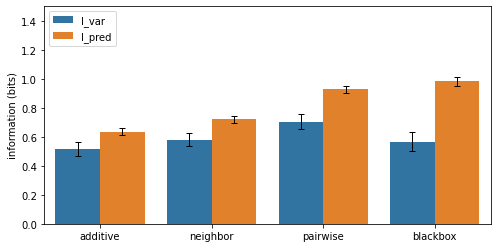

In [154]:
# Fill out dataframe containing values to plot
# This dataframe will then be used by seaborn's barplot() function
info_df = pd.DataFrame(columns=['name', 'gpmap', 'metric', 'I', 'dI'])
model_names = []
for gpmap_type in gpmap_types:
    for i in range(10):

        # Get model
        name = f'Smith_2013_HepG2_{gpmap_type}_ge_{i}'
        model = model_dict[name]

        # Compute variational information on test data
        I_var, dI_var =  model.I_variational(x=test_df['Pattern'], y=test_df['HepG2'])
        var_row = {'name':name,
               'gpmap':gpmap_type,
               'metric':'I_var',
               'I':I_var,
               'dI':dI_var}

        # Compute predictive information on test data
        I_pred, dI_pred = model.I_predictive(x=test_df['Pattern'], y=test_df['HepG2'])
        pred_row = {'name':name,
               'gpmap':gpmap_type,
               'metric':'I_pred',
               'I':I_pred,
               'dI':dI_pred}
        print(I_pred)
        if i == 0:
            info_df = info_df.append(var_row, ignore_index=True)
            info_df = info_df.append(pred_row, ignore_index=True)
            model_names.append(name)
        elif I_pred > info_df['I'][len(info_df['I']) - 1]:
            info_df.iloc[len(info_df) - 2] = var_row
            info_df.iloc[len(info_df) - 1] = pred_row
            model_names[-1] = name

# Print dataframe
print('Contents of info_df:', info_df, sep='\n')

# Create figure
fig, ax = plt.subplots(figsize=[8, 4])

# Plot bars
sns.barplot(ax=ax,
            data=info_df,
            hue='metric',
            x='gpmap',
            y='I')

# Plot errorbars
x = np.array([[x-.2,x+.2] for x in range(4)]).ravel()
ax.errorbar(x=x,
            y=info_df['I'].values,
            yerr=info_df['dI'].values,
            color='k', capsize=3, linestyle='none',
            elinewidth=1, capthick=1, solid_capstyle='round')

ax.set_ylabel('information (bits)')
ax.set_xlabel('')
ax.set_xlim([-.5, 3.5])
ax.set_ylim([0, 1.5])
ax.legend(loc='upper left')

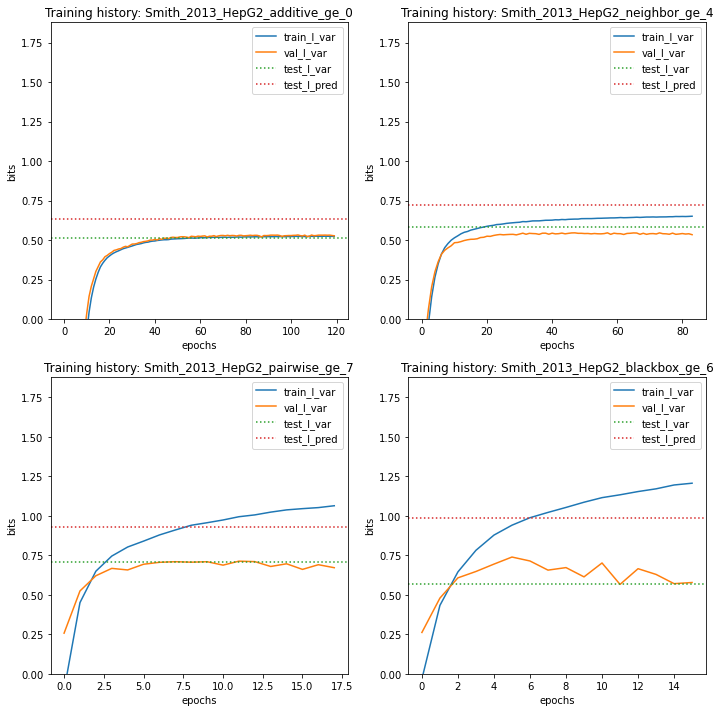

In [155]:
# Create figure and axes for plotting
fig, axs = plt.subplots(2,2,figsize=[10,10])
axs = axs.ravel()

# Loop over models
for ax, name in zip(axs, model_names):
    # Get model
    model = model_dict[name]

    # Plot I_var_train, the variational information on training data as a function of epoch
    ax.plot(model.history['I_var'],
            label=r'train_I_var')

    # Plot I_var_val, the variational information on validation data as a function of epoch
    ax.plot(model.history['val_I_var'],
            label=r'val_I_var')

    # Get part of info_df referring to this model and index by metric
    ix = (info_df['name']==name)
    sub_df = info_df[ix].set_index('metric')
    # Show I_var_test, the variational information of the final model on test data
    ax.axhline(sub_df.loc['I_var','I'], color='C2', linestyle=':',
               label=r'test_I_var')

    # Show I_pred_test, the predictive information of the final model on test data
    ax.axhline(sub_df.loc['I_pred','I'], color='C3', linestyle=':',
               label=r'test_I_pred')

    # Style plot
    ax.set_xlabel('epochs')
    ax.set_ylabel('bits')
    ax.set_title(f'Training history: {name}')
    ax.set_ylim([0, 2*I_pred])
    ax.legend()

# Clean up figure
fig.tight_layout()

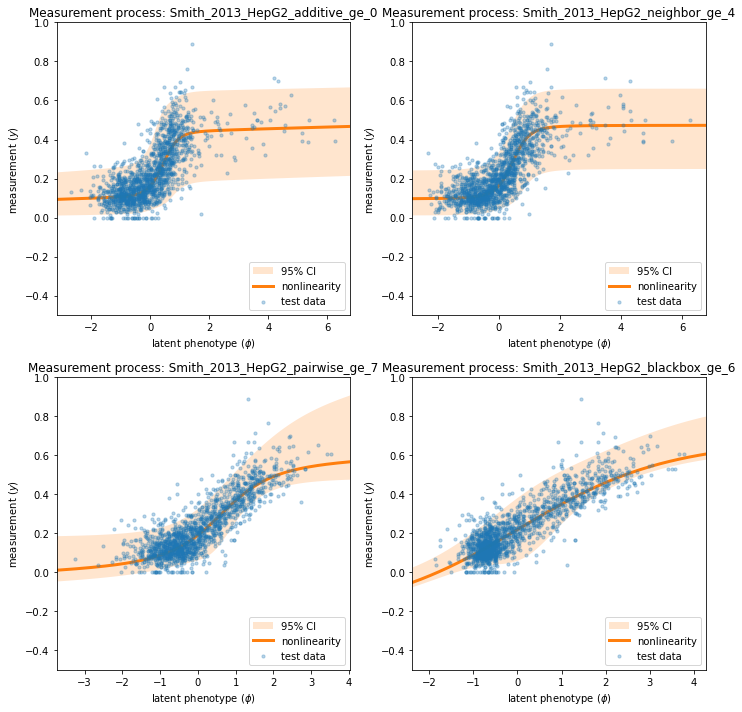

In [156]:
# Create figure and axes for plotting
fig, axs = plt.subplots(2,2,figsize=[10,10])
axs = axs.ravel()

# Loop over models
for ax, name in zip(axs, model_names):

    # Get model
    model = model_dict[name]

    # Get test data y values
    y_test = test_df['HepG2']

    # Compute phi on test data
    phi_test = model.x_to_phi(test_df['Pattern'])

    ## Set phi lims and create a grid in phi space
    phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
    phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

    # Compute yhat for each phi gridpoint
    yhat_grid = model.phi_to_yhat(phi_grid)

    # Compute 95% CI for each yhat
    q = [0.025, 0.975]
    yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

    # Plote 95% confidence interval
    ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                    alpha=0.2, color='C1', lw=0, label='95% CI')

    # Plot GE nonlinearity
    ax.plot(phi_grid, yhat_grid,
            linewidth=3, color='C1', label='nonlinearity')

    # Plot scatter of phi and y values.
    ax.scatter(phi_test, y_test,
               color='C0', s=10, alpha=.3, label='test data', zorder=+100)

    # Style plot
    ax.set_xlim(phi_lim)
    ax.set_xlabel('latent phenotype ($\phi$)')
    ax.set_ylim([-0.5,1])
    ax.set_ylabel('measurement ($y$)')
    ax.set_title(f'Measurement process: {name}')
    ax.legend(loc='lower right')

fig.tight_layout()

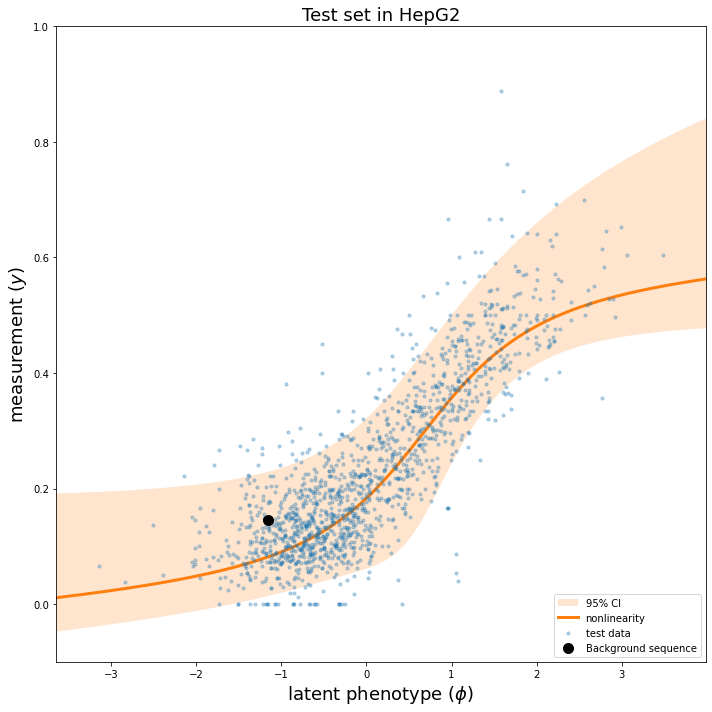

In [157]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[10,10])
#axs = axs.ravel()

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = 'Smith_2013_HepG2_pairwise_ge_1'
# Get model
model = model_dict[name]

# Get test data y values
y_test = test_df['HepG2']

# Compute phi on test data
phi_test = model.x_to_phi(test_df['Pattern'])

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.2, color='C1', lw=0, label='95% CI')

# Plot GE nonlinearity
ax.plot(phi_grid, yhat_grid,
        linewidth=3, color='C1', label='nonlinearity')

# Plot scatter of phi and y values.
ax.scatter(phi_test, y_test,
            color='C0', s=10, alpha=.3, label='test data', zorder=+100)

# Plot basal
ax.scatter(model.x_to_phi('bbbbbbbbbbbbbbbbbb'), test_df['HepG2'][0],
            color='black', s=100, alpha=1, label='Background sequence', zorder=+100)

# Style plot
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)', fontsize = 18)
ax.set_ylim([-0.1,1])
ax.set_ylabel('measurement ($y$)', fontsize = 18)
ax.set_title(f'Test set in HepG2', fontsize = 18)
ax.legend(loc='lower right')

fig.tight_layout()

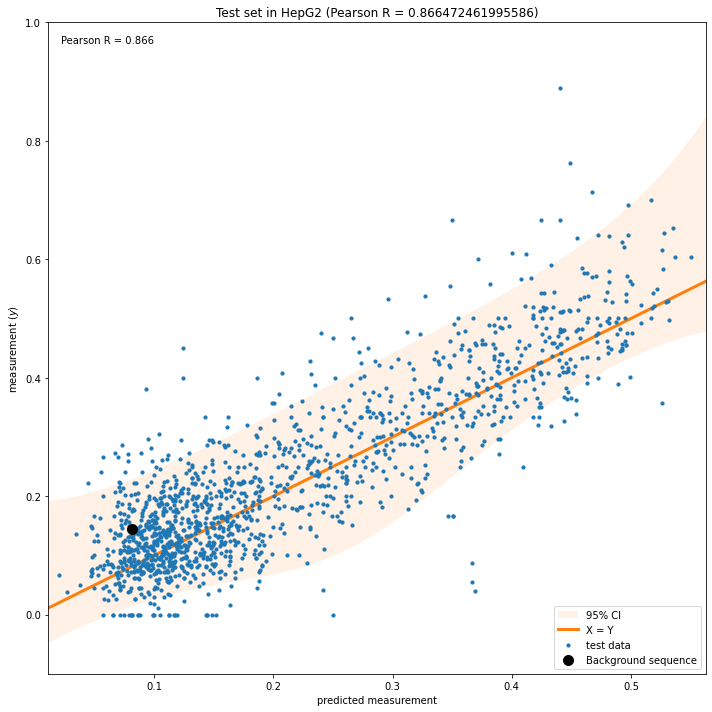

In [159]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[10,10])
#axs = axs.ravel()

# Loop over models
#for ax, name in zip(axs, ['all_promoters_pairwise_ge']):

name = 'Smith_2013_HepG2_pairwise_ge_1'
# Get model
model = model_dict[name]

# Get test data y values
y_test = test_df['HepG2']

# Compute phi on test data
phi_test = model.x_to_phi(test_df['Pattern'])
yhat_test = model.phi_to_yhat(phi_test)

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat for each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plote 95% confidence interval
ax.fill_between(yhat_grid, yqs_grid[:, 0], yqs_grid[:, 1],
                alpha=0.1, color='C1', lw=0, label='95% CI')

# Plot x=y
ax.plot(yhat_grid, yhat_grid,
        linewidth=3, color='C1', label='X = Y')

# Plot scatter of yhat and y values.
ax.scatter(yhat_test, y_test,
            color='C0', s=10, alpha=1, label='test data', zorder=+100)

# Plot basal
ax.scatter(model.phi_to_yhat(model.x_to_phi('bbbbbbbbbbbbbbbbbb')), test_df['HepG2'][0],
            color='black', s=100, alpha=1, label='Background sequence', zorder=+100)

# Style plot
ax.set_xlim([min(yhat_grid), max(yhat_grid)])
ax.set_xlabel('predicted measurement')
ax.set_ylim([-0.1,1])
ax.set_ylabel('measurement ($y$)')
ax.set_title(f'Test set in HepG2 (Pearson R = ' + str(scipy.stats.pearsonr(yhat_test, y_test)[0]) + ")")
ax.text(0.02,0.98, "Pearson R = " + str(scipy.stats.pearsonr(yhat_test, y_test)[0])[0:5], ha="left", va="top", transform=ax.transAxes)
ax.legend(loc='lower right')

fig.tight_layout()

In [79]:
# Focus on pairwise model
model = model_dict['Smith_2013_HepG2_pairwise_ge_1']

# Retrieve G-P map parameter dict and view dict keys
theta_dict = model.get_theta(gauge="consensus")
theta_dict.keys()

dict_keys(['L', 'C', 'alphabet', 'theta_0', 'theta_lc', 'theta_lclc', 'theta_mlp', 'logomaker_df'])

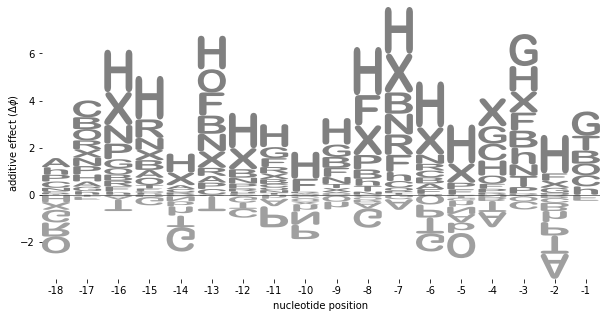

In [80]:
# Get logo dataframe
logo_df = theta_dict['logomaker_df']

# Set NaN parameters to zero
logo_df.fillna(0, inplace=True)

# Create figure
fig, ax = plt.subplots(figsize=[10,5])

# Draw logo
logo = logomaker.Logo(df=logo_df,
                      ax=ax,
                      fade_below=.5,
                      shade_below=.5,
                      width=.9,
                      font_name='Arial Rounded MT Bold')
ylim = ax.get_ylim()

# Highlight positions +1 and +2 to gray to indicate incomplete mutagenesis at these positions
#logo.highlight_position_range(pmin=3, pmax=4, color='w', alpha=1, zorder=10)
#logo.highlight_position_range(pmin=3, pmax=4,color='gray', alpha=.1, zorder=11)

# Create a large `G` at position +1 to indicate that only this base was present in the sequences under consideration
#logo.style_single_glyph(p=3,
#                        c='G',
#                        flip=False,
#                        floor=ylim[0],
#                        ceiling=ylim[1],
#                        color='gray',
#                        zorder=30,
#                        alpha=.5)

# Make 'C' and 'U' at position +2 black
#logo.style_single_glyph(p=4, c='U', color='k', zorder=30, alpha=1)
#logo.style_single_glyph(p=4, c='C', color='k', zorder=30, alpha=.5)

# Style logo
logo.style_spines(visible=False)
#ax.axvline(2.5, linestyle=':', color='k', zorder=30)
ax.set_ylabel('additive effect ($\Delta \phi$)', labelpad=-1)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels([f'{x:+d}' for x in range(-18,0) if x!=0])
ax.set_xlabel('nucleotide position', labelpad=5);

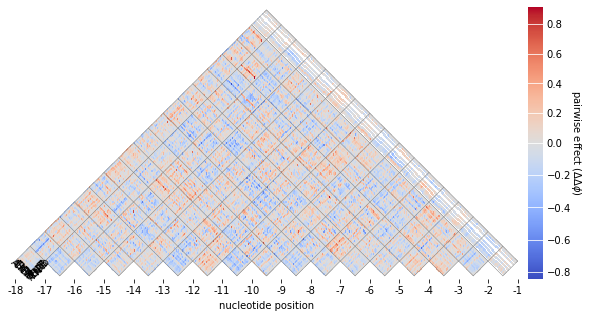

In [81]:
# Get pairwise parameters from theta_dict
theta_lclc = theta_dict['theta_lclc']

# Create fig and ax objects
fig, ax = plt.subplots(figsize=[10,5])

# Draw heatmap
ax, cb = mavenn.heatmap_pairwise(values=theta_lclc,
                                 alphabet=list(Site_letters.values()) + ["B", "b"],
                                 ax=ax,
                                 gpmap_type='pairwise',
                                 cmap_size='3%')

# Style heatmap
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
ax.set_xticklabels([f'{x:+d}' for x in range(-18,0) if x!=0])
ax.set_xlabel('nucleotide position', labelpad=5);

# Style colorbar
cb.set_label('pairwise effect ($\Delta \Delta \phi$)',
             labelpad=5, ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')

In [82]:
TF_TF_interactions = np.zeros((14, 14))
for i, site1 in enumerate(theta_dict['theta_lclc']):
    if i < 18:
        for j, TF1 in enumerate(site1):
            if j < 14:
                for k, site2 in enumerate(TF1[(i + 1):(len(TF1) - 1)]):
                    #print(k, site2[0:8])
                    TF_TF_interactions[j] = TF_TF_interactions[j] + site2[0:14]
        #print(i, TF1[(i + 1):(len(TF1[0]) - 1)])
        #print(i, TF1[(i + 1):(len(site[0]) - 1)])
        
TF_TF_interactions

array([[-1.16009278e+00,  1.27126367e+00,  9.08066234e-01,
         2.35159217e+00,  4.88389873e-01,  1.45435016e+00,
         1.19213491e+00,  3.95593168e+00,  2.56158927e+00,
         7.63611220e-01,  3.29397512e+00,  2.08732361e+00,
        -1.50031551e+00,  1.79999860e+00],
       [ 1.03241646e+00, -2.10433169e+00, -3.50396908e+00,
        -2.89219363e-01, -9.54246426e+00, -2.16220144e+00,
        -1.37743612e+00, -2.65969194e+00, -2.21809338e-01,
        -9.58510981e-01,  2.34632521e+00, -4.06707084e+00,
        -2.60740972e+00,  1.02844763e+00],
       [ 1.12220851e+00, -1.40300754e+00, -7.03922741e+00,
        -3.22679041e-01, -2.89972661e+00, -1.01873418e+00,
         1.65535408e+00,  1.83575299e+00, -3.04312504e+00,
         1.75107437e+00,  6.19703902e-01, -9.03403050e-01,
        -1.84757469e+00,  7.09143796e-01],
       [ 3.82524592e+00,  1.42328160e+00, -7.11139624e-01,
         2.97888253e+00, -6.74963480e+00,  6.30628016e-01,
         1.41539334e+00,  2.72050806e+00,  2.

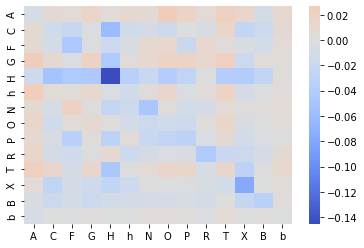

In [83]:
import seaborn as sns
sns.heatmap(TF_TF_interactions/(18*17/2), cmap = 'coolwarm', center = 0, xticklabels = list(Site_letters.values()) + ["B", "b"], yticklabels = list(Site_letters.values()) + ["B", "b"])
plt.show()

In [75]:
Data_file = open("Smith_2013_by_replicate_trainval.pkl", "rb")
trainval_df = pickle.load(Data_file)
Data_file.close()

Data_file = open("Smith_2013_by_replicate_test.pkl", "rb")
test_df = pickle.load(Data_file)
Data_file.close()

Data_df = pd.DataFrame()
Data_df['x'] = pd.concat([trainval_df['Pattern'], test_df['Pattern']])
assignments = []
for validation in trainval_df['validation']:
    if validation:
        assignments.append('validation')
    else:
        assignments.append('training')
assignments = assignments + ['test']*len(test_df)
Data_df['set'] = assignments
Data_df

,x,set
0,BBBBBBBBBBBBABBBBB,training
1,BBBBBBBBBBBBTBBBBB,training
2,BBBBBBBBBBBBNBBBBB,training
3,BBBBBBBBBBBBHBBBBB,training
4,BBBBBBBBBBBBFBBBBB,validation
...,...,...
1461,PbbAbXbHbbhNbbRbFb,test
1462,RbbONbbHbXbbhAbPbb,test
1463,RbbXbOPbbNbbHbhAbb,test
1464,PbbHbFbAbRbXbbNbhb,test


In [85]:
# Get model
model = model_dict['Smith_2013_HepG2_pairwise_ge_1']

Smith_2013_HepG2_bootstrap_models = model.bootstrap(Data_df)

Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 0 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.621 sec.


0epoch [00:00, ?epoch/s]

Training time: 210.3 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 1 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.799 sec.


0epoch [00:00, ?epoch/s]

Training time: 220.5 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 2 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.987 sec.


0epoch [00:00, ?epoch/s]

Training time: 201.6 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 3 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.572 sec.


0epoch [00:00, ?epoch/s]

Training time: 700.0 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 4 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.62 sec.


0epoch [00:00, ?epoch/s]

Training time: 185.8 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 5 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.619 sec.


0epoch [00:00, ?epoch/s]

Training time: 200.6 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 6 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.638 sec.


0epoch [00:00, ?epoch/s]

Training time: 212.2 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 7 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.714 sec.


0epoch [00:00, ?epoch/s]

Training time: 176.8 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 8 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.657 sec.


0epoch [00:00, ?epoch/s]

Training time: 165.2 seconds
Training set   :   11,973 observations (  80.37%)
Validation set :    1,459 observations (   9.79%)
Test set       :    1,466 observations (   9.84%)
-------------------------------------------------
Total dataset  :   14,898 observations ( 100.00%)

training model 9 ...
N = 13,432 observations set as training data.
Using 10.9% for validation.
Data shuffled.
Time to set data: 0.54 sec.


0epoch [00:00, ?epoch/s]

Training time: 176.6 seconds


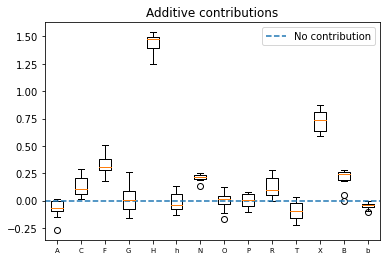

In [107]:
Additive_contributions = []
for model in Smith_2013_HepG2_bootstrap_models:
    theta_dict = model.get_theta(gauge="consensus")
    logo_df = theta_dict['logomaker_df']
    Additive_contributions.append(np.asarray(logo_df.mean()))

#Additive_contributions
plt.boxplot(np.asarray(Additive_contributions))
x = np.linspace(1, 14, 14)
plt.xticks(x, list(Site_letters.values()) + ["B", "b"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No contribution")
plt.legend()
plt.title("Additive contributions")
plt.show()

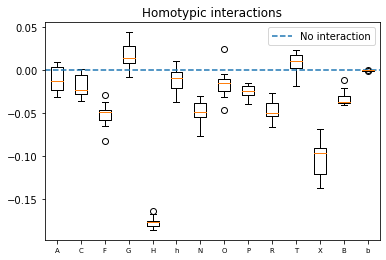

In [108]:
Interactions = []
for model in Smith_2013_HepG2_bootstrap_models:
    theta_dict = model.get_theta(gauge="consensus")
    Interactions.append([])
    for i in range(14):
        All_interactions = theta_dict['theta_lclc'][:, i, :, i].flatten()
        Interactions[-1].append(np.mean(All_interactions[np.logical_not(np.isnan(All_interactions))]))

plt.boxplot(np.asarray(Interactions))
x = np.linspace(1, 14, 14)
plt.xticks(x, list(Site_letters.values()) + ["B", "b"], fontsize = 7)
plt.axhline(0, linestyle = "--", label = "No interaction")
plt.legend()
plt.title("Homotypic interactions")
plt.show()

In [109]:
Additive_errorbars = []
for i in range(14):
    Additive_errorbars.append(np.std(np.asarray(Additive_contributions)[:, i]))

Interaction_errorbars = []
for i in range(14):
    Interaction_errorbars.append(np.std(np.asarray(Interactions)[:, i]))

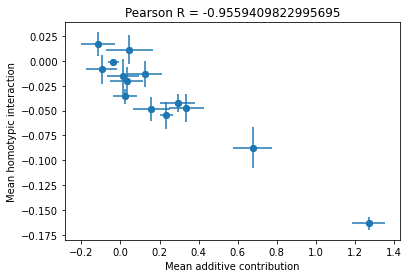

In [160]:
# Focus on pairwise model
model = model_dict['Smith_2013_HepG2_pairwise_ge_1']

# Retrieve G-P map parameter dict and view dict keys
theta_dict = model.get_theta(gauge="consensus")
theta_dict.keys()

import scipy.stats
logo_df = theta_dict['logomaker_df']
Additive_contributions = np.asarray(logo_df.mean())

Interactions = []
for i in range(14):
    All_interactions = theta_dict['theta_lclc'][:, i, :, i].flatten()
    Interactions.append(np.mean(All_interactions[np.logical_not(np.isnan(All_interactions))]))

plt.scatter(Additive_contributions, Interactions)
plt.errorbar(Additive_contributions, Interactions, xerr = Additive_errorbars, yerr = Interaction_errorbars, fmt = "o")
plt.xlabel("Mean additive contribution")
plt.ylabel("Mean homotypic interaction")
plt.title("Pearson R = " + str(scipy.stats.pearsonr(Additive_contributions, Interactions)[0]))
plt.show()